In [1]:
import json
import pandas as pd

In [2]:
#make path in python path easy toget from every where?
with open("data/datasets/dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)   # dict / list

In [3]:
df = pd.DataFrame(data)

In [278]:
df[df.user_id==0]

browser          os locale  user_id gender             location  \
100      Chrome      Ubuntu  ru-RU        0      m         France/Paris   
300      Chrome  Windows 10  ru-RU        0      m       Canada/Toronto   
486      Chrome      Ubuntu  ru-RU        0      m         France/Paris   
669     Firefox  Windows 10  ru-RU        0      m         France/Paris   
1552    Firefox  Windows 10  ru-RU        0      m          USA/Chicago   
...         ...         ...    ...      ...    ...                  ...   
159378   Chrome  Windows 10  ru-RU        0      m         France/Paris   
159469  Firefox      Ubuntu  ru-RU        0      m       Canada/Toronto   
159634  Firefox  Windows 10  ru-RU        0      m  Singapore/Singapore   
159827  Firefox  Windows 10  ru-RU        0      m         France/Paris   
159990  Firefox  Windows 10  ru-RU        0      m          USA/Chicago   

                                                    sites      time  \
100     [{'site': 'vk.com', 'length': 107}, {'site': '...  20:21:00   
300     [{'site': 'mail.google.com', 'length': 228}, {...  16:28:00   
486     [{'site': 'mail.google.com', 'length': 175}, {...  19:35:00   
669     [{'site': 'mail.google.com', 'length': 328}, {...  20:08:00   
1552    [{'site': 'mail.google.com', 'length': 74}, {'...  02:22:00   
...                                                   ...       ...   
159378  [{'site': 'mail.google.com', 'length': 222}, {...  20:37:00   
159469  [{'site': 'mail.google.com', 'length': 80}, {'...  16:52:00   
159634  [{'site': 'amazon.com', 'length': 52}, {'site'...  05:00:00   
159827  [{'site': 'mail.google.com', 'length': 157}, {...  20:05:00   
159990  [{'site': 'mail.google.com', 'length': 224}, {...  17:08:00   

              date  
100     2016-04-13  
300     2018-02-23  
486     2016-06-21  
669     2016-01-24  
1552    2017-08-15  
...            ...  
159378  2016-12-29  
159469  2018-04-03  
159634  2018-12-11  
159827  2016-02-03  
159990  2017-08-01  

[800 rows x 9 columns]

In [4]:
def sites_to_wide(lst, k=15):
    lst = (lst or [])[:k]            # cap to k; handle None
    out = {}
    for i, d in enumerate(lst, 1):
        out[f"site_{i}"] = d.get("site") if isinstance(d, dict) else None
        out[f"length_{i}"] = d.get("length") if isinstance(d, dict) else None
    # pad if fewer than k
    for i in range(len(lst)+1, k+1):
        out[f"site_{i}"] = None
        out[f"length_{i}"] = None
    return pd.Series(out)

df_wide = df.join(df["sites"].apply(sites_to_wide, k=15)).drop(columns=["sites"])

In [5]:
df_wide[['country', 'city']] = df_wide['location'].str.split('/', n=1, expand=True)

In [6]:
df_wide = df_wide.drop(columns='location')

In [257]:
df_wide[df_wide.user_id==0].locale.unique()

array(['ru-RU'], dtype=object)

In [258]:
df_wide.locale.unique()

array(['de-DE', 'pt-PT', 'bg-BG', 'en-US', 'ro-RO', 'en-SG', 'ja-JP',
       'ru-RU', 'en-GB', 'pl-PL', 'it-IT', 'uk-UA', 'pt-BR', 'en-NZ',
       'en-CA', 'nl-NL', 'fr-FR', 'es-MX', 'en-AU'], dtype=object)

In [241]:
df_wide.head()

browser          os locale  user_id gender      time        date  \
0             Chrome   Windows 8  de-DE      164      m  03:57:00  2016-08-14   
1             Chrome  Windows 10  pt-PT       99      f  13:52:00  2016-05-31   
2             Chrome  Windows 10  bg-BG       28      m  17:40:00  2019-04-15   
3  Internet Explorer      Ubuntu  en-US      163      f  20:23:00  2018-03-25   
4            Firefox      Debian  ro-RO      177      f  01:10:00  2018-09-08   

              site_1  length_1           site_2  ...               site_12  \
0           lenta.ru       296         lenta.ru  ...        akamaiedge.net   
1  windowsupdate.com        56       amazon.com  ...         wikimedia.org   
2          slack.com       158        slack.com  ...  googletagmanager.com   
3         amazon.com       168    microsoft.com  ...           windows.com   
4             vk.com        43  mail.google.com  ...                  None   

  length_12       site_13 length_13                     site_14 length_14  \
0      88.0  stardock.com     207.0               mediaarea.net      78.0   
1     217.0          None       NaN                        None       NaN   
2      73.0          None       NaN                        None       NaN   
3      42.0     ytimg.com     184.0  universityofcalifornia.edu     322.0   
4       NaN          None       NaN                        None       NaN   

       site_15 length_15      country            city  
0         None       NaN       Canada         Toronto  
1         None       NaN  Netherlands       Amsterdam  
2         None       NaN       Brazil  Rio de Janeiro  
3  dufcrun.com      44.0  New Zealand        Auckland  
4         None       NaN  New Zealand        Auckland  

[5 rows x 39 columns]

In [244]:
df_wide[df_wide.user_id==0].locale.unique()

array(['ru-RU'], dtype=object)

In [43]:
site_cols = [c for c in df_wide.columns if c.startswith('site_')]

In [46]:
unique_sites = (
    df_wide[site_cols]
      .stack(dropna=True)   # long format, drops NaN
      .astype(str)
      .str.strip()
      .unique()
)

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_57010/3409757072.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)   # long format, drops NaN


In [47]:
unique_sites

array(['lenta.ru', 'vk.com', 'wikipedia.org', ..., 'claimlookup.com',
       'curbside.com', 'netsky.club'], shape=(157771,), dtype=object)

In [9]:
df_wide.loc[0]

browser                    Chrome
os                      Windows 8
locale                      de-DE
user_id                       164
gender                          m
time                     03:57:00
date                   2016-08-14
site_1                   lenta.ru
length_1                      296
site_2                   lenta.ru
length_2                     69.0
site_3                     vk.com
length_3                     94.0
site_4                   lenta.ru
length_4                    129.0
site_5              wikipedia.org
length_5                     70.0
site_6              instagram.com
length_6                    120.0
site_7                    msn.com
length_7                     54.0
site_8                 amazon.com
length_8                    213.0
site_9                outlook.com
length_9                    140.0
site_10              verisign.com
length_10                   166.0
site_11      googleadservices.com
length_11                   115.0
site_12       

In [10]:
site_cols = [col for col in df_wide.columns if col.startswith("site_")]
length_cols = [col for col in df_wide.columns if col.startswith("length_")]

# Melt into long format
df_sites = pd.wide_to_long(
    df_wide,
    stubnames=["site", "length"],
    i=[c for c in df_wide.columns if not c.startswith(("site_", "length_"))],
    j="visit",
    sep="_",
    suffix=r"\d+"
).reset_index()
df_sites = df_sites.dropna(subset=["site"])

In [267]:
len(set(df_sites[df_sites.user_id==0].site.values))

1515

In [16]:
target_id = 0

user_sites = df_sites[df_sites["user_id"] == target_id]
user_freq = user_sites["site"].value_counts().rename("user_count")

# Frequencies for all others
other_freq = df_sites[df_sites["user_id"] != target_id]["site"].value_counts().rename("others_count")

# Merge
compare_df = pd.concat([user_freq, other_freq], axis=1).fillna(0).astype(int).reset_index()
compare_df.rename(columns={"index": "site"}, inplace=True)

In [22]:
user_freq

site
amazon.com               755
wikipedia.org            752
lenta.ru                 742
slack.com                736
toptal.com               727
                        ... 
brunomars.com              1
operator555.su             1
coinpriceforecast.com      1
technotology.com           1
cifra1.ru                  1
Name: user_count, Length: 1515, dtype: int64

In [26]:
other_freq[:10]

site
amazon.com               153380
wikipedia.org            150352
vk.com                    55821
youtube.com               44315
mail.google.com           44234
slack.com                 43651
lenta.ru                  43286
toptal.com                36689
netflix.com               32176
scorecardresearch.com     31011
Name: others_count, dtype: int64

In [24]:
compare_df

site  user_count  others_count  user_share  others_share  \
0          amazon.com         755        153380    0.071884  7.462403e-02   
1       wikipedia.org         752        150352    0.071599  7.315082e-02   
2            lenta.ru         742         43286    0.070646  2.105996e-02   
3           slack.com         736         43651    0.070075  2.123754e-02   
4          toptal.com         727         36689    0.069218  1.785031e-02   
...               ...         ...           ...         ...           ...   
157766    amgload.net           0             1    0.000000  4.865304e-07   
157767    goldman.com           0             1    0.000000  4.865304e-07   
157768   rasalsup.org           0             1    0.000000  4.865304e-07   
157769      getbee.io           0             1    0.000000  4.865304e-07   
157770    netsky.club           0             1    0.000000  4.865304e-07   

                diff  
0      -2.739810e-03  
1      -1.552229e-03  
2       4.958653e-02  
3       4.883768e-02  
4       5.136800e-02  
...              ...  
157766 -4.865304e-07  
157767 -4.865304e-07  
157768 -4.865304e-07  
157769 -4.865304e-07  
157770 -4.865304e-07  

[157771 rows x 6 columns]

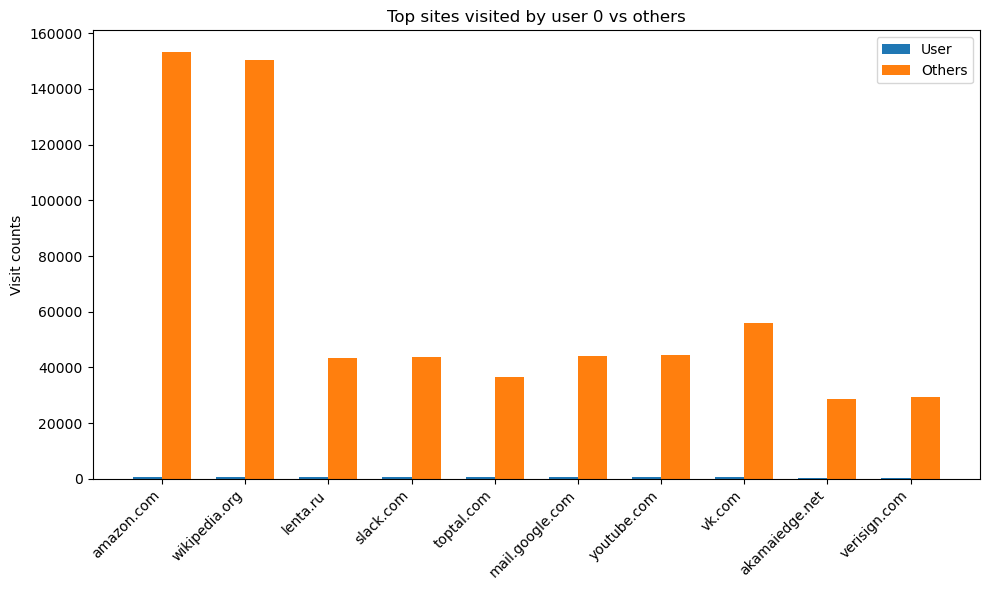

In [18]:
import matplotlib.pyplot as plt

top_sites = compare_df.sort_values("user_count", ascending=False).head(10)

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(top_sites))

plt.bar(x, top_sites["user_count"], width=bar_width, label="User")
plt.bar([i+bar_width for i in x], top_sites["others_count"], width=bar_width, label="Others")

plt.xticks([i+bar_width/2 for i in x], top_sites["site"], rotation=45, ha="right")
plt.ylabel("Visit counts")
plt.title(f"Top sites visited by user {target_id} vs others")
plt.legend()
plt.tight_layout()
plt.show()

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_user_site_rank_and_coverage(df_wide, target_id=0, log_scale=True, elbow=True, save_prefix=None):
    """
    For the target user:
      1) Rank–frequency plot of site counts (how often each site appears across all sessions)
      2) Cumulative coverage: fraction of total visits covered by the top-N sites

    Params
    ------
    df_wide : DataFrame with site_1..site_15 columns and 'user_id'
    target_id : the user to analyze
    log_scale : if True, rank–frequency is plotted on log–log axes
    elbow : if True, auto-detect and mark the elbow (drop point) on the coverage curve
    save_prefix : if given (e.g., 'user0_sites'), saves PNGs as '<prefix>_rank.png' and '<prefix>_coverage.png'
    """
    site_cols = [c for c in df_wide.columns if c.startswith("site_")]

    # flatten all site entries for user
    s = df_wide.loc[df_wide["user_id"] == target_id, site_cols].stack().dropna().astype(str)
    s = s[s.str.lower() != "none"]

    if s.empty:
        raise ValueError(f"No sites for user_id={target_id}")

    counts = s.value_counts()
    totals = counts.sum()
    ranks = np.arange(1, len(counts) + 1)

    # 1) Rank–frequency plot
    plt.figure(figsize=(8,5))
    plt.plot(ranks, counts.values, marker='o', linewidth=1)
    if log_scale:
        plt.xscale("log"); plt.yscale("log")
        plt.xlabel("Rank (log)")
        plt.ylabel("Site frequency (log)")
        plt.title(f"User {target_id} — Rank–frequency of sites (log–log)")
    else:
        plt.xlabel("Rank")
        plt.ylabel("Site frequency")
        plt.title(f"User {target_id} — Rank–frequency of sites")

    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_rank.png", dpi=300, bbox_inches="tight")
    plt.show()

    # 2) Cumulative coverage curve
    cum = counts.cumsum().values / totals  # fraction of visits covered by top-N
    plt.figure(figsize=(8,5))
    plt.plot(ranks, cum, marker='o', linewidth=1)
    plt.axhline(0.8, linestyle='--')  # 80% reference (optional)
    plt.xlabel("Top-N sites")
    plt.ylabel("Cumulative share of user’s visits")
    plt.title(f"User {target_id} — Coverage by top-N sites")
    
    elbow_idx = None
    if elbow and len(cum) >= 3:
        # Simple "knee" via max distance from straight line 0->1
        x = ranks / ranks.max()
        y = cum
        # distance from line y=x
        dist = np.abs(y - x) / np.sqrt(2)
        elbow_idx = int(dist.argmax())
        n_star = ranks[elbow_idx]
        cov_star = cum[elbow_idx]
        plt.axvline(n_star, linestyle=':', linewidth=1)
        plt.annotate(f"elbow ≈ top-{n_star}\ncoverage ≈ {cov_star:.2%}",
                     xy=(n_star, cov_star), xytext=(10, -10),
                     textcoords="offset points")
    
    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_coverage.png", dpi=300, bbox_inches="tight")
    plt.show()

    # quick textual summary
    def n_for(p):
        return int(np.searchsorted(cum, p, side="left") + 1)
    print({
        "unique_sites": int(len(counts)),
        "total_visits": int(totals),
        "top_10_coverage": float(cum[min(9, len(cum)-1)] if len(cum)>=10 else cum[-1]),
        "top_50_coverage": float(cum[min(49, len(cum)-1)] if len(cum)>=50 else cum[-1]),
        "n_sites_for_80pct": n_for(0.80),
        "n_sites_for_90pct": n_for(0.90),
        "elbow_topN": int(ranks[elbow_idx]) if elbow_idx is not None else None
    })


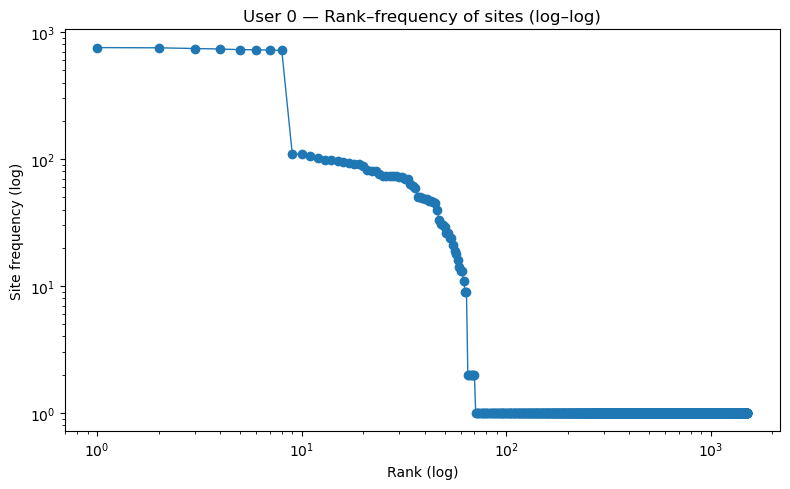

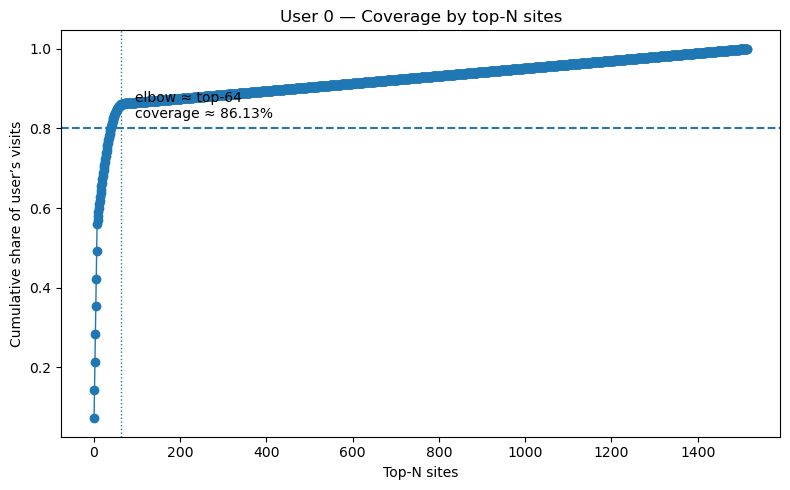

{'unique_sites': 1515, 'total_visits': 10503, 'top_10_coverage': 0.580405598400457, 'top_50_coverage': 0.8381414833856993, 'n_sites_for_80pct': 40, 'n_sites_for_90pct': 465, 'elbow_topN': 64}


In [275]:
# Basic
plot_user_site_rank_and_coverage(df_wide, target_id=0)

# # Save PNGs to file (good for your report)
# plot_user_site_rank_and_coverage(df_wide, target_id=0, save_prefix="user0_sites")

# # Linear axes (if you prefer not log–log)
# plot_user_site_rank_and_coverage(df_wide, target_id=0, log_scale=False)


In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_global_site_long_tail(
    df_wide,
    target_id=0,
    show_user_overlay=True,
    target_coverage=0.80,      # highlight where 80% of traffic is reached
    mark_top_k=500,            # also mark coverage at top-500
    save_prefix=None
):
    """
    Visualize the long tail of sites across the whole dataset and (optionally) compare to User 0.

    Produces:
      1) Rank–frequency (log–log) for ALL users
      2) Coverage curve: cumulative share of total visits by Top-N sites
         - vertical line at N for target_coverage (e.g., 80%)
         - vertical line at Top-500 with its coverage
      3) Optional overlay: User 0 coverage curve

    Returns a dict with key stats (e.g., N for 80%, coverage at 500, etc.).
    """
    site_cols = [c for c in df_wide.columns if c.startswith("site_")]

    # ---- Population site counts (counting repeats)
    all_sites = df_wide[site_cols].stack().dropna().astype(str)
    all_sites = all_sites[all_sites.str.lower() != "none"]
    if all_sites.empty:
        raise ValueError("No site data found.")

    pop_counts = all_sites.value_counts()
    pop_total  = int(pop_counts.sum())
    ranks = np.arange(1, len(pop_counts)+1)

    # ---- 1) Rank–frequency (population)
    plt.figure(figsize=(8,5))
    plt.plot(ranks, pop_counts.values, linewidth=1)
    plt.xscale("log"); plt.yscale("log")
    plt.xlabel("Rank (log)")
    plt.ylabel("Site frequency (log)")
    plt.title("Population — Rank–frequency of sites (log–log)")
    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_rankfreq.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ---- 2) Coverage curve (population)
    pop_cum = pop_counts.cumsum().values / pop_counts.sum()
    plt.figure(figsize=(9,5))
    plt.plot(ranks, pop_cum, label="Population", linewidth=2)

    # optional overlay for User 0
    overlay_stats = {}
    if show_user_overlay:
        s_user = df_wide.loc[df_wide["user_id"] == target_id, site_cols].stack().dropna().astype(str)
        s_user = s_user[s_user.str.lower() != "none"]
        if not s_user.empty:
            u_counts = s_user.value_counts()
            u_cum = u_counts.cumsum().values / u_counts.sum()
            u_ranks = np.arange(1, len(u_counts)+1)
            plt.plot(u_ranks, u_cum, label=f"User {target_id}", alpha=0.8)
            # interpolate user coverage at 500 (if fewer than 500 sites, clamp)
            if mark_top_k is not None:
                k = min(mark_top_k, len(u_cum))
                overlay_stats["user_top_k_coverage"] = float(u_cum[k-1])
        else:
            overlay_stats["user_top_k_coverage"] = None

    # mark target_coverage (e.g., 80%)
    def n_for(cum, p):
        return int(np.searchsorted(cum, p, side="left") + 1)
    n80 = n_for(pop_cum, target_coverage)
    cov500 = pop_cum[min(mark_top_k, len(pop_cum)) - 1] if mark_top_k is not None else None

    plt.axhline(target_coverage, linestyle="--", alpha=0.6)
    plt.axvline(n80, linestyle=":", alpha=0.7)
    plt.annotate(f"{int(target_coverage*100)}% coverage at top-{n80}",
                 xy=(n80, target_coverage), xytext=(10, -15), textcoords="offset points")

    if mark_top_k is not None:
        plt.axvline(mark_top_k, linestyle=":", alpha=0.5)
        plt.annotate(f"Top-{mark_top_k}: {cov500:.1%} coverage",
                     xy=(mark_top_k, pop_cum[min(mark_top_k,len(pop_cum))-1]),
                     xytext=(10, 10), textcoords="offset points")

    plt.xlabel("Top-N sites")
    plt.ylabel("Cumulative share of site visits")
    title_extra = f" (User {target_id} overlay)" if show_user_overlay else ""
    plt.title(f"Coverage by Top-N sites — Population{title_extra}")
    plt.legend()
    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_coverage.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ---- stats to report
    stats = {
        "population_unique_sites": int(len(pop_counts)),
        "population_total_site_visits": pop_total,
        "population_N_for_target": n80,
        "population_top_k_coverage": float(cov500) if cov500 is not None else None,
        "target_coverage": float(target_coverage),
        "mark_top_k": int(mark_top_k) if mark_top_k is not None else None
    }
    stats.update(overlay_stats)
    print(stats)
    return stats


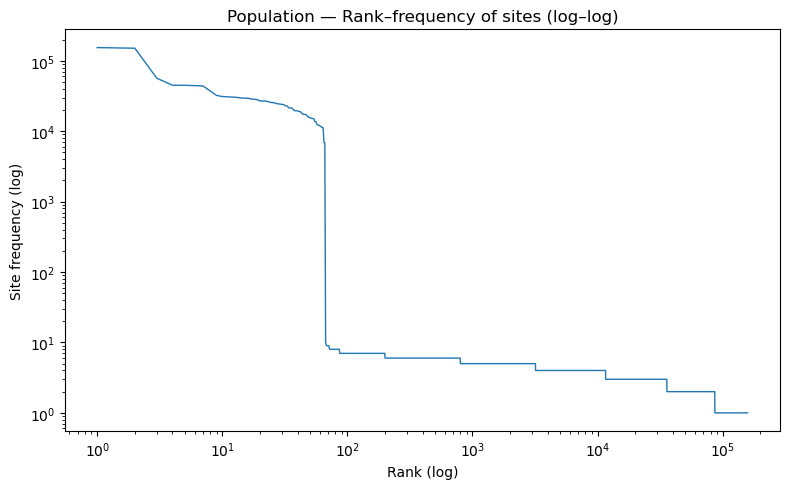

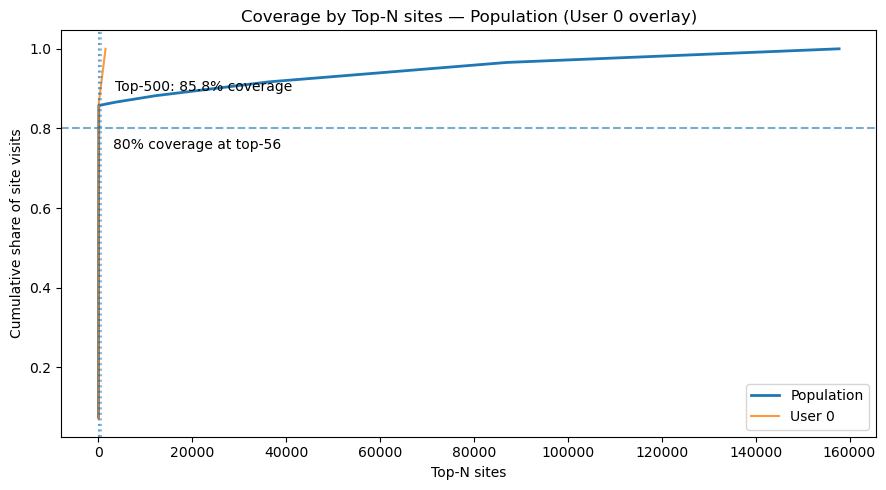

{'population_unique_sites': 157770, 'population_total_site_visits': 2065870, 'population_N_for_target': 56, 'population_top_k_coverage': 0.8584276842202074, 'target_coverage': 0.8, 'mark_top_k': 500, 'user_top_k_coverage': 0.9033609444920498}


{'population_unique_sites': 157770,
 'population_total_site_visits': 2065870,
 'population_N_for_target': 56,
 'population_top_k_coverage': 0.8584276842202074,
 'target_coverage': 0.8,
 'mark_top_k': 500,
 'user_top_k_coverage': 0.9033609444920498}

In [277]:
plot_global_site_long_tail(df_wide, target_id=0)

# Save images for your report
# plot_global_site_long_tail(df_wide, target_id=0, save_prefix="global_sites")

# # If you only want population (no overlay)
# plot_global_site_long_tail(df_wide, show_user_overlay=False)

In [19]:
# Total visits
total_user = user_freq.sum()
total_others = other_freq.sum()

# Convert to proportions
compare_df["user_share"] = compare_df["user_count"] / total_user
compare_df["others_share"] = compare_df["others_count"] / total_others


In [20]:
# Difference in percentage points
compare_df["diff"] = compare_df["user_share"] - compare_df["others_share"]

# Focus on sites with largest positive differences
top_diff = compare_df.sort_values("diff", ascending=False).head(10)


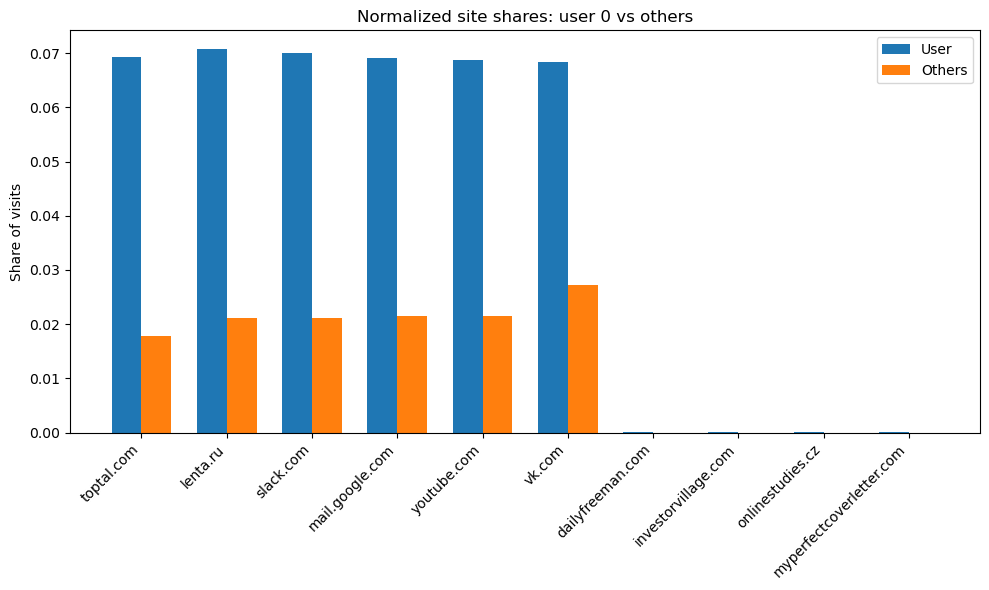

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(top_diff))

plt.bar(x, top_diff["user_share"], width=bar_width, label="User")
plt.bar([i+bar_width for i in x], top_diff["others_share"], width=bar_width, label="Others")

plt.xticks([i+bar_width/2 for i in x], top_diff["site"], rotation=45, ha="right")
plt.ylabel("Share of visits")
plt.title(f"Normalized site shares: user {target_id} vs others")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/1221809434.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sites["hour"] = pd.to_datetime(df_sites["time"], errors="coerce").dt.hour
/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/1221809434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites["hour"] = pd.to_datetime(df_sites["time"], errors="coerce").dt.hour


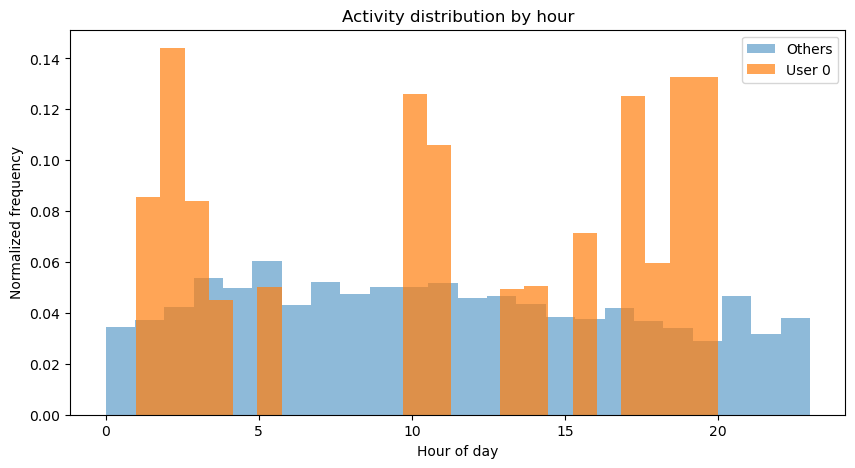

In [27]:
df_sites["hour"] = pd.to_datetime(df_sites["time"], errors="coerce").dt.hour

user_hours = df_sites[df_sites["user_id"]==target_id]["hour"]
other_hours = df_sites[df_sites["user_id"]!=target_id]["hour"]

plt.figure(figsize=(10,5))
plt.hist(other_hours, bins=24, alpha=0.5, label="Others", density=True)
plt.hist(user_hours, bins=24, alpha=0.7, label=f"User {target_id}", density=True)
plt.xlabel("Hour of day")
plt.ylabel("Normalized frequency")
plt.title("Activity distribution by hour")
plt.legend()
plt.show()


In [28]:
user_lengths = user_sites.groupby("site")["length"].mean()
other_lengths = df_sites[df_sites["user_id"]!=target_id].groupby("site")["length"].mean()
length_compare = (user_lengths - other_lengths).sort_values(ascending=False)


In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_sites_per_session_user_vs_others(
    df_wide,
    target_id=0,
    distinct=True,          # True = count unique sites; False = count non-null visits
    show_hist=True,
    show_box=True,
    bins="auto",
    bootstrap_iters=2000,   # for 95% CI on means
    random_state=42
):
    """
    Compare number of sites per session for user vs others.
    distinct=True counts unique sites in a session.
    distinct=False counts all non-null site_* entries (including repeats).
    """
    rng = np.random.default_rng(random_state)
    site_cols = [c for c in df_wide.columns if c.startswith("site_")]

    # Count sites per session
    if distinct:
        counts = df_wide[site_cols].apply(
            lambda r: r.dropna().pipe(lambda x: x[x.str.lower() != "none"]).nunique(),
            axis=1
        )
    else:
        counts = df_wide[site_cols].apply(
            lambda r: r.dropna().pipe(lambda x: x[x.str.lower() != "none"]).shape[0],
            axis=1
        )

    # Split user vs others
    mask_user = (df_wide["user_id"] == target_id)
    user_counts  = counts[mask_user].to_numpy()
    other_counts = counts[~mask_user].to_numpy()

    if user_counts.size == 0 or other_counts.size == 0:
        raise ValueError("No sessions for user or others after filtering.")

    # Basic stats
    mu_u, mu_o = user_counts.mean(), other_counts.mean()

    # Bootstrap 95% CI for means
    def mean_ci(a):
        boots = np.array([rng.choice(a, size=a.size, replace=True).mean() for _ in range(bootstrap_iters)])
        return boots.mean(), np.percentile(boots, [2.5, 97.5])

    mean_u, (lo_u, hi_u) = mean_ci(user_counts)
    mean_o, (lo_o, hi_o) = mean_ci(other_counts)

    # --- Bar chart of means with CI ---
    plt.figure(figsize=(6,5))
    xs = np.arange(2)
    means = [mean_o, mean_u]
    lows  = [mean_o - lo_o, mean_u - lo_u]
    highs = [hi_o - mean_o, hi_u - mean_u]
    plt.bar(xs, means, yerr=[lows, highs], capsize=6)
    plt.xticks(xs, ["Others (avg)", f"User {target_id}"])
    plt.ylabel("# sites per session" + (" (unique)" if distinct else " (non-unique)"))
    plt.title("Mean sites per session with 95% CI")
    plt.tight_layout()
    plt.show()

    # --- Overlaid histogram of distributions ---
    if show_hist:
        all_vals = np.concatenate([user_counts, other_counts])
        if isinstance(bins, str) or isinstance(bins, int):
            hb = np.histogram_bin_edges(all_vals, bins=bins)
        else:
            hb = bins

        plt.figure(figsize=(10,5))
        plt.hist(other_counts, bins=hb, density=True, alpha=0.5, label="Others")
        plt.hist(user_counts,  bins=hb, density=True, alpha=0.75, label=f"User {target_id}")
        plt.xlabel("# sites per session" + (" (unique)" if distinct else " (non-unique)"))
        plt.ylabel("Density")
        plt.title("Distribution of sites per session — user vs others")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # --- Boxplot summary ---
    if show_box:
        plt.figure(figsize=(7,5))
        plt.boxplot([other_counts, user_counts], labels=["Others", f"User {target_id}"], showfliers=False)
        plt.ylabel("# sites per session" + (" (unique)" if distinct else " (non-unique)"))
        plt.title("Sites per session summary")
        plt.tight_layout()
        plt.show()

    # Print quick stats
    print({
        "others_mean": float(mu_o), "user_mean": float(mu_u),
        "others_ci95": (float(lo_o), float(hi_o)),
        "user_ci95": (float(lo_u), float(hi_u)),
        "others_median": float(np.median(other_counts)),
        "user_median": float(np.median(user_counts)),
        "n_others": int(other_counts.size),
        "n_user": int(user_counts.size),
    })


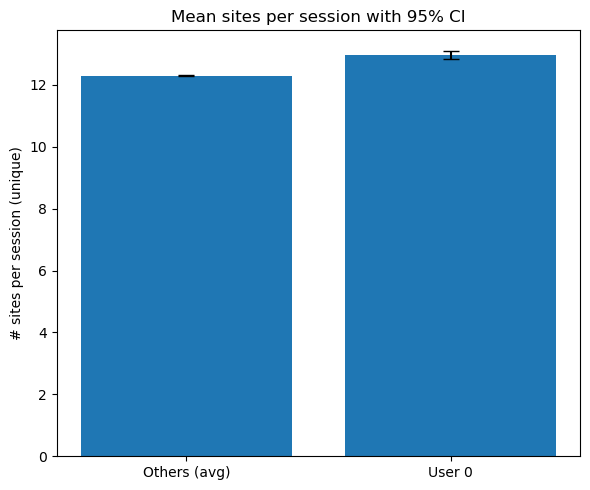

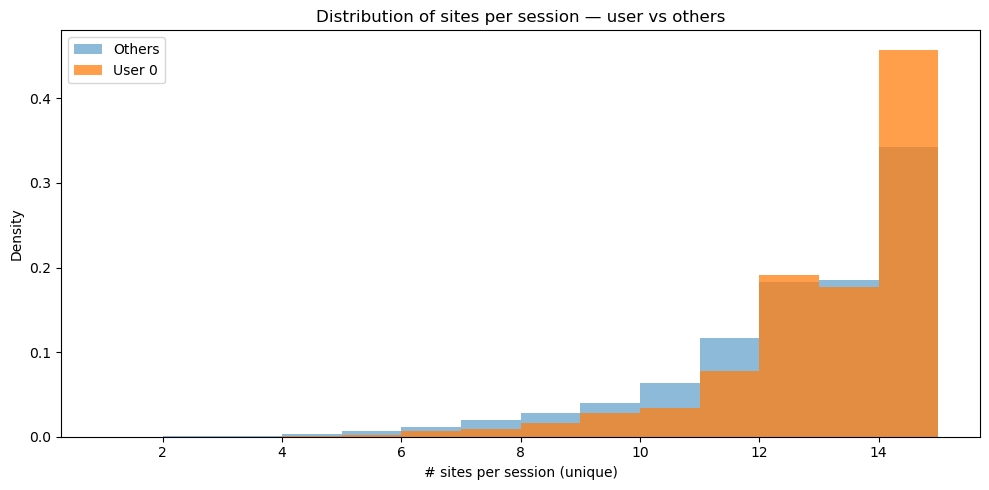

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/1758943740.py:88: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([other_counts, user_counts], labels=["Others", f"User {target_id}"], showfliers=False)


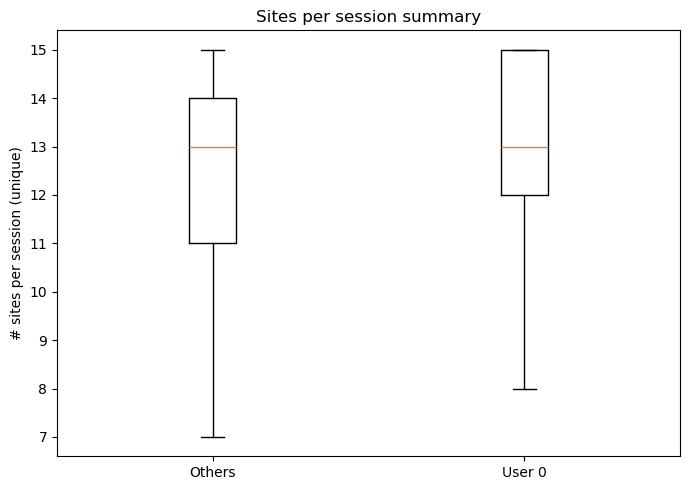

{'others_mean': 12.289070351758793, 'user_mean': 12.97125, 'others_ci95': (12.277906878140703, 12.299874842964824), 'user_ci95': (12.837468750000001, 13.1025), 'others_median': 13.0, 'user_median': 13.0, 'n_others': 159200, 'n_user': 800}


In [269]:
plot_sites_per_session_user_vs_others(df_wide, target_id=0, distinct=True)

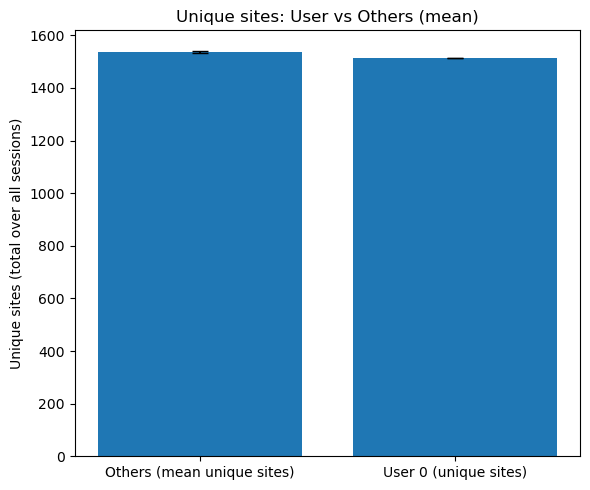

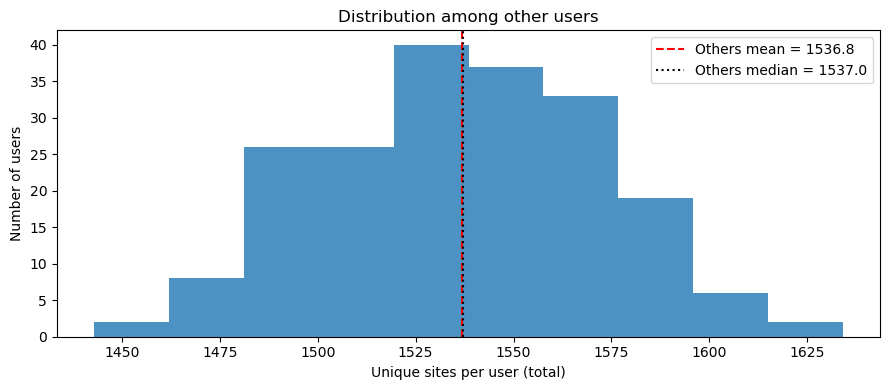

{'user_unique_sites': 1515, 'others_mean_unique_sites': 1536.81, 'others_median_unique_sites': 1537.0, 'others_std_unique_sites': 35.4, 'n_other_users': 199, 'others_mean_95%CI': (1531.84, 1541.58)}


In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_unique_sites_user_vs_others_mean(df_wide, target_id=0, show_dist=True, bootstrap_ci=True, iters=2000, random_state=42):
    """
    Compares:
      - total unique sites ever visited by user `target_id`
      - average unique sites per *other* user (mean across users)
    """

    rng = np.random.default_rng(random_state)
    site_cols = [c for c in df_wide.columns if c.startswith("site_")]

    # Flatten sites per user across all sessions
    # -> per-user Series of all sites, then nunique per user
    s = df_wide.set_index("user_id")[site_cols].stack().dropna()
    s = s[s.str.lower() != "none"]
    per_user_unique = s.groupby(level=0).nunique()  # user_id -> unique site count

    # Extract target and others
    user_unique = int(per_user_unique.get(target_id, 0))
    others = per_user_unique.drop(index=target_id, errors="ignore")
    others_mean = float(others.mean())
    others_median = float(others.median())
    others_std = float(others.std(ddof=1)) if len(others) > 1 else 0.0

    # Optional bootstrap 95% CI for the others' mean
    ci = None
    if bootstrap_ci and len(others) > 1:
        boots = np.array([rng.choice(others.values, size=len(others), replace=True).mean() for _ in range(iters)])
        ci = (float(np.percentile(boots, 2.5)), float(np.percentile(boots, 97.5)))

    # --- Bar chart: user0 vs others' mean ---
    plt.figure(figsize=(6,5))
    bars = [others_mean, user_unique]
    labels = ["Others (mean unique sites)", f"User {target_id} (unique sites)"]
    yerr = None
    if ci:
        # Only show CI for Others mean
        yerr = [[others_mean - ci[0], 0.0],   # lower error for [others, user]
                [ci[1] - others_mean, 0.0]]   # upper error
    plt.bar(labels, bars, yerr=yerr, capsize=6)
    plt.ylabel("Unique sites (total over all sessions)")
    plt.title("Unique sites: User vs Others (mean)")
    plt.tight_layout()
    plt.show()

    # Optional distribution of others for context
    if show_dist:
        plt.figure(figsize=(9,4))
        plt.hist(others.values, bins="auto", density=False, alpha=0.8)
        plt.axvline(others_mean, color="red", linestyle="--", label=f"Others mean = {others_mean:.1f}")
        plt.axvline(others_median, color="black", linestyle=":", label=f"Others median = {others_median:.1f}")
        plt.xlabel("Unique sites per user (total)")
        plt.ylabel("Number of users")
        plt.title("Distribution among other users")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Print summary
    out = {
        "user_unique_sites": user_unique,
        "others_mean_unique_sites": round(others_mean, 2),
        "others_median_unique_sites": round(others_median, 2),
        "others_std_unique_sites": round(others_std, 2),
        "n_other_users": int(len(others)),
    }
    if ci:
        out["others_mean_95%CI"] = (round(ci[0],2), round(ci[1],2))
    print(out)

# Usage
plot_unique_sites_user_vs_others_mean(df_wide, target_id=0, show_dist=True)


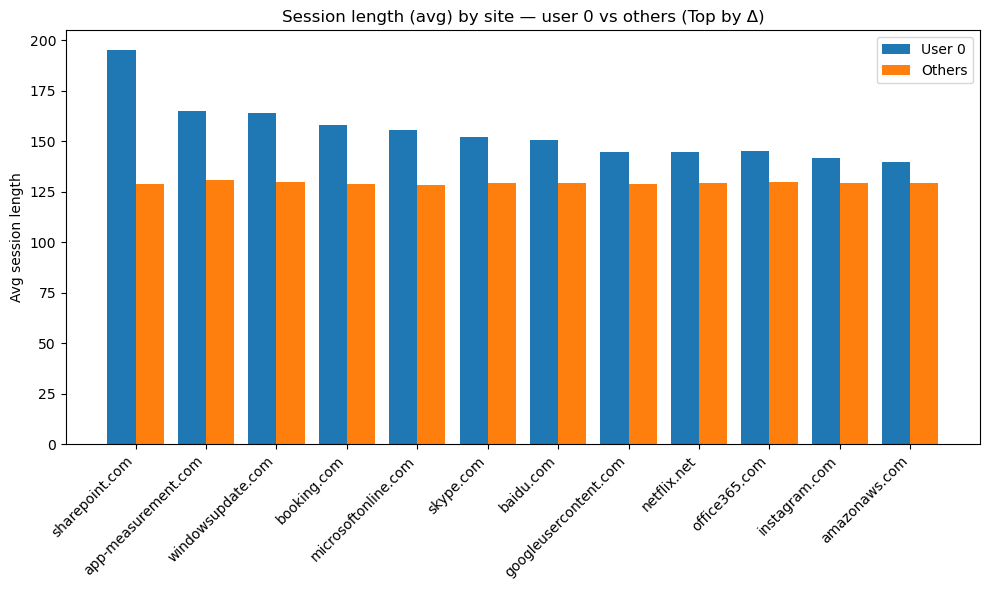

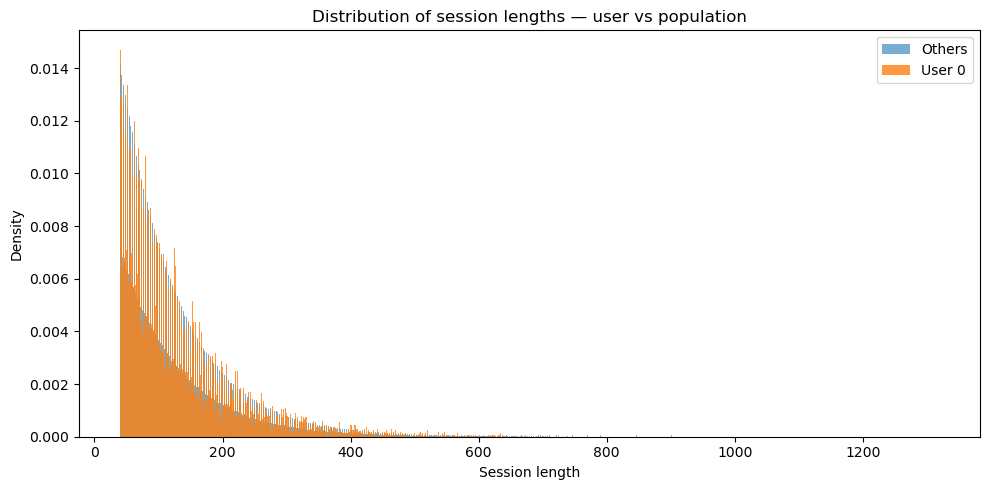

site  user_avg_len  others_avg_len   avg_diff     ratio  \
0          sharepoint.com    195.111111      128.766566  66.344545  1.515231   
1     app-measurement.com    165.052632      130.566341  34.486290  1.264128   
2       windowsupdate.com    164.071429      129.862467  34.208962  1.263425   
3             booking.com    158.200000      128.968941  29.231059  1.226652   
4     microsoftonline.com    155.720000      128.282748  27.437252  1.213881   
5               skype.com    152.067797      129.426512  22.641284  1.174935   
6               baidu.com    150.777778      129.300009  21.477769  1.166108   
7   googleusercontent.com    144.636364      128.957527  15.678837  1.121581   
8             netflix.net    144.666667      129.114452  15.552215  1.120453   
9           office365.com    145.230769      130.019090  15.211679  1.116996   
10          instagram.com    141.859375      129.219077  12.640298  1.097821   
11          amazonaws.com    139.707317      129.324065  10.383252  1.080289   

    user_visits  others_visits  
0            18        12269.0  
1            19        13619.0  
2            14        13604.0  
3            70        23922.0  
4            50        19070.0  
5            59        19425.0  
6             9        11213.0  
7            11        15398.0  
8            24        16199.0  
9            26        12572.0  
10           64        24375.0  
11           82        22801.0

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_session_length_profile(df_wide, target_id, top_n=10, min_user_visits=2, min_other_visits=20):
    """
    Build a session-length profile comparing one user's average per-site session time vs others.
    - Shows top N sites where the user's avg session length most exceeds the population.
    - Also shows a whole-population vs user distribution comparison (histogram).
    """
    # ----- 1) Wide -> Long
    site_cols   = [c for c in df_wide.columns if c.startswith("site_")]
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    base_cols   = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]

    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site", "length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index()

    # Clean
    df_long = df_long.dropna(subset=["site"])
    df_long["length"] = pd.to_numeric(df_long["length"], errors="coerce")
    df_long = df_long.dropna(subset=["length"])
    # Optional: remove obviously bad zeros/negatives if any
    df_long = df_long[df_long["length"] > 0]

    # ----- 2) Split user vs others
    user_mask = df_long["user_id"] == target_id
    user_df   = df_long[user_mask].copy()
    other_df  = df_long[~user_mask].copy()

    if user_df.empty:
        raise ValueError(f"No rows found for user_id={target_id}")

    # ----- 3) Aggregate average session length per site + visit counts (for filtering)
    user_stats  = (user_df.groupby("site")["length"]
                   .agg(user_avg_len="mean", user_visits="count"))
    other_stats = (other_df.groupby("site")["length"]
                   .agg(others_avg_len="mean", others_visits="count"))

    comp = user_stats.join(other_stats, how="left").fillna({"others_avg_len": 0, "others_visits": 0})

    # Filter to sites where we have enough data for a stable comparison
    comp = comp[(comp["user_visits"] >= min_user_visits) & (comp["others_visits"] >= min_other_visits)]

    if comp.empty:
        raise ValueError(
            "No sites meet the minimum-visit thresholds. "
            f"Lower min_user_visits={min_user_visits} / min_other_visits={min_other_visits}."
        )

    # ----- 4) Compute deltas and pick top N
    comp["avg_diff"] = comp["user_avg_len"] - comp["others_avg_len"]        # absolute difference
    comp["ratio"]    = comp["user_avg_len"] / comp["others_avg_len"].replace(0, np.nan)  # over-index factor

    top = comp.sort_values(["avg_diff", "user_avg_len"], ascending=False).head(top_n)

    # ----- 5a) Plot: Top sites by (user_avg - others_avg)
    plt.figure(figsize=(10, 6))
    x = np.arange(len(top))
    plt.bar(x, top["user_avg_len"], width=0.4, label=f"User {target_id}")
    plt.bar(x + 0.4, top["others_avg_len"], width=0.4, label="Others")
    plt.xticks(x + 0.2, top.index, rotation=45, ha="right")
    plt.ylabel("Avg session length")
    plt.title(f"Session length (avg) by site — user {target_id} vs others (Top by Δ)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ----- 5b) Plot: Distribution of session lengths (all visits)
    plt.figure(figsize=(10, 5))
    # Use same binning for fair visual comparison
    all_lengths = df_long["length"]
    bins = np.histogram_bin_edges(all_lengths, bins="auto")
    plt.hist(other_df["length"], bins=bins, alpha=0.6, density=True, label="Others")
    plt.hist(user_df["length"],  bins=bins, alpha=0.8, density=True, label=f"User {target_id}")
    plt.xlabel("Session length")
    plt.ylabel("Density")
    plt.title("Distribution of session lengths — user vs population")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ----- 6) Also return the comparison table for inspection/saving
    # Add a tidy DataFrame with key metrics
    out = top.reset_index().rename(columns={"index": "site"})
    return out[["site", "user_avg_len", "others_avg_len", "avg_diff", "ratio", "user_visits", "others_visits"]]

result = plot_session_length_profile(df_wide, target_id=0, top_n=12, min_user_visits=2, min_other_visits=30)
display(result)


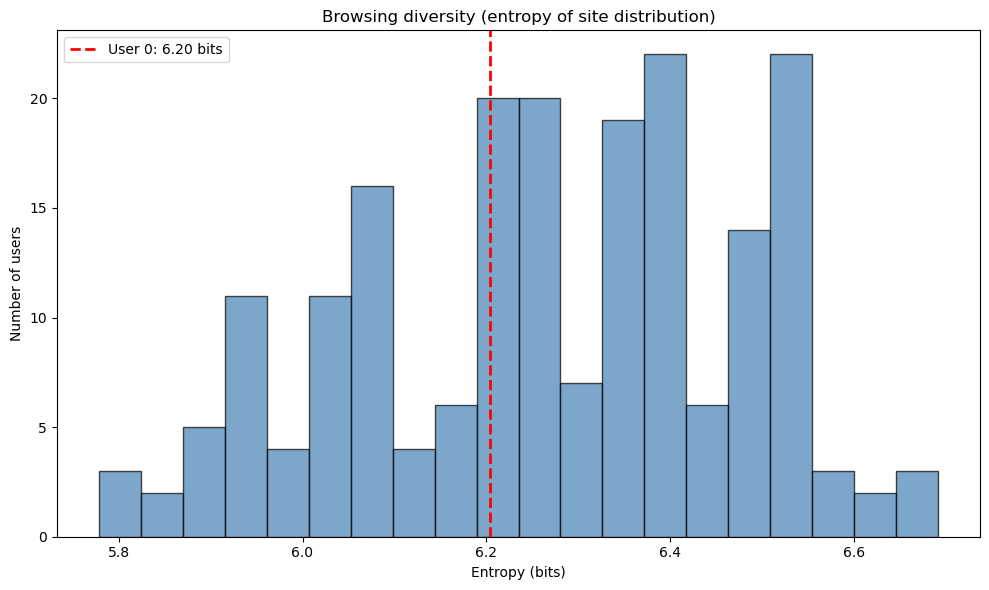

User 0 entropy = 6.20, population mean = 6.27


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

def shannon_entropy(series):
    """Shannon entropy of a categorical series (site visits)."""
    p = series.value_counts(normalize=True)
    return entropy(p, base=2)  # base 2 = bits

def plot_user_entropy(df_wide, target_id):
    # ---- 1) Wide -> Long
    site_cols   = [c for c in df_wide.columns if c.startswith("site_")]
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    base_cols   = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]

    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site", "length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index()

    df_long = df_long.dropna(subset=["site"])

    # ---- 2) Entropy per user
    user_entropies = df_long.groupby("user_id")["site"].apply(shannon_entropy)
    user_entropies = user_entropies.dropna()

    # ---- 3) Get target entropy
    target_entropy = user_entropies.get(target_id, None)
    if target_entropy is None:
        raise ValueError(f"No entropy computed for user_id={target_id}")

    # ---- 4) Plot distribution with target marker
    plt.figure(figsize=(10,6))
    plt.hist(user_entropies, bins=20, alpha=0.7, color="steelblue", edgecolor="black")
    plt.axvline(target_entropy, color="red", linestyle="--", linewidth=2,
                label=f"User {target_id}: {target_entropy:.2f} bits")
    plt.xlabel("Entropy (bits)")
    plt.ylabel("Number of users")
    plt.title("Browsing diversity (entropy of site distribution)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return target_entropy, user_entropies

# --------- Example usage ----------
target_entropy, all_entropies = plot_user_entropy(df_wide, target_id=0)
print(f"User {0} entropy = {target_entropy:.2f}, population mean = {all_entropies.mean():.2f}")


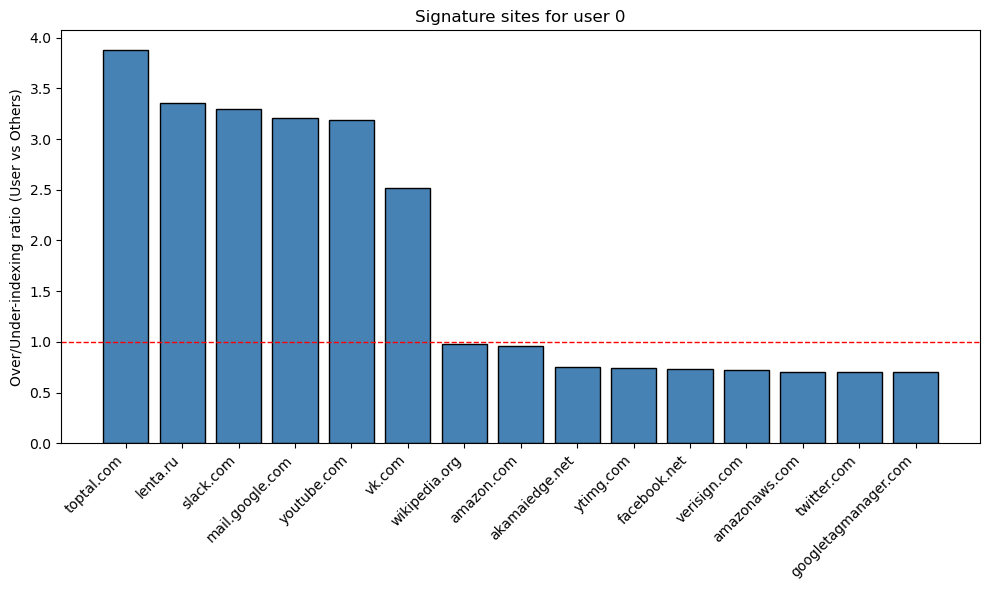

site  user_count  others_count  user_share  others_share  \
0             toptal.com       727.0       36689.0    0.069218      0.017850   
1               lenta.ru       742.0       43286.0    0.070646      0.021060   
2              slack.com       736.0       43651.0    0.070075      0.021238   
3        mail.google.com       726.0       44234.0    0.069123      0.021521   
4            youtube.com       721.0       44315.0    0.068647      0.021561   
5                 vk.com       718.0       55821.0    0.068361      0.027159   
6          wikipedia.org       752.0      150352.0    0.071599      0.073151   
7             amazon.com       755.0      153380.0    0.071884      0.074624   
8         akamaiedge.net       110.0       28575.0    0.010473      0.013903   
9              ytimg.com        74.0       19483.0    0.007046      0.009479   
10          facebook.net        73.0       19418.0    0.006950      0.009447   
11          verisign.com       109.0       29317.0    0.010378      0.014264   
12         amazonaws.com        82.0       22801.0    0.007807      0.011093   
13           twitter.com       105.0       29334.0    0.009997      0.014272   
14  googletagmanager.com        92.0       25707.0    0.008759      0.012507   

       ratio  
0   3.877709  
1   3.354541  
2   3.299592  
3   3.211863  
4   3.183913  
5   2.517117  
6   0.978780  
7   0.963285  
8   0.753326  
9   0.743280  
10  0.735690  
11  0.727585  
12  0.703779  
13  0.700478  
14  0.700347

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_over_under_indexing(df_wide, target_id, top_n=15, min_user_visits=2, min_other_visits=20):
    """
    Compare one user's site preferences vs the population using over/under-indexing ratios.
    ratio = user_share / others_share
    """
    # ---- 1) Wide -> Long
    site_cols   = [c for c in df_wide.columns if c.startswith("site_")]
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    base_cols   = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]

    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site", "length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index()

    df_long = df_long.dropna(subset=["site"])

    # ---- 2) User vs Others counts
    user_mask = df_long["user_id"] == target_id
    user_sites = df_long[user_mask]["site"].value_counts().rename("user_count")
    other_sites = df_long[~user_mask]["site"].value_counts().rename("others_count")

    compare = pd.concat([user_sites, other_sites], axis=1).fillna(0)

    # ---- 3) Normalize -> shares
    compare["user_share"]   = compare["user_count"]   / compare["user_count"].sum()
    compare["others_share"] = compare["others_count"] / compare["others_count"].sum()

    # ---- 4) Ratio (avoid div-by-0)
    compare["ratio"] = compare["user_share"] / compare["others_share"].replace(0, np.nan)

    # Apply filters
    compare = compare[
        (compare["user_count"] >= min_user_visits) &
        (compare["others_count"] >= min_other_visits)
    ].dropna(subset=["ratio"])

    if compare.empty:
        raise ValueError("No sites pass thresholds. Lower min_user_visits or min_other_visits.")

    # ---- 5) Pick most over-indexed
    top = compare.sort_values("ratio", ascending=False).head(top_n)

    # ---- 6) Plot
    plt.figure(figsize=(10,6))
    bars = plt.bar(top.index, top["ratio"], color="steelblue", edgecolor="black")
    plt.axhline(1, color="red", linestyle="--", linewidth=1)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Over/Under-indexing ratio (User vs Others)")
    plt.title(f"Signature sites for user {target_id}")
    plt.tight_layout()
    plt.show()

    return top.reset_index().rename(columns={"index": "site"})


plot_over_under_indexing(df_wide, 0, top_n=15, min_user_visits=2, min_other_visits=20)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_temporal_session_length(df_wide, target_id, by="user_vs_others"):
    """
    Visualize temporal patterns of session length.
    - by="user_vs_others": heatmap with rows=User/Others, cols=hours
    - by="site": heatmap with rows=sites (for user), cols=hours
    """
    # ---- 1) Wide -> Long
    site_cols   = [c for c in df_wide.columns if c.startswith("site_")]
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    base_cols   = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]

    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site", "length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index().dropna(subset=["site", "length", "time"])

    # Ensure numeric
    df_long["length"] = pd.to_numeric(df_long["length"], errors="coerce")
    df_long = df_long.dropna(subset=["length"])

    # Parse hour
    df_long["hour"] = pd.to_datetime(df_long["time"], errors="coerce").dt.hour

    if by == "user_vs_others":
        # ---- 2) Group: User vs Others
        df_long["group"] = np.where(df_long["user_id"] == target_id,
                                    f"User {target_id}", "Others")

        heat = df_long.groupby(["group","hour"])["length"].mean().reset_index()
        pivot = heat.pivot(index="group", columns="hour", values="length")

        plt.figure(figsize=(12,3))
        sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label':'Avg session length (s)'})
        plt.title(f"Temporal session length pattern — User {target_id} vs Others")
        plt.xlabel("Hour of day")
        plt.ylabel("")
        plt.show()

        return pivot

    elif by == "site":
        # ---- 3) Group: per site for user only
        user_df = df_long[df_long["user_id"] == target_id]
        heat = user_df.groupby(["site","hour"])["length"].mean().reset_index()
        pivot = heat.pivot(index="site", columns="hour", values="length")

        plt.figure(figsize=(12, max(4,len(pivot)//2)))
        sns.heatmap(pivot, annot=False, cmap="YlOrRd", cbar_kws={'label':'Avg session length (s)'})
        plt.title(f"Temporal session length pattern — User {target_id} (by site)")
        plt.xlabel("Hour of day")
        plt.ylabel("Site")
        plt.show()

        return pivot

    else:
        raise ValueError("by must be 'user_vs_others' or 'site'")

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/3314820879.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["hour"] = pd.to_datetime(df_long["time"], errors="coerce").dt.hour


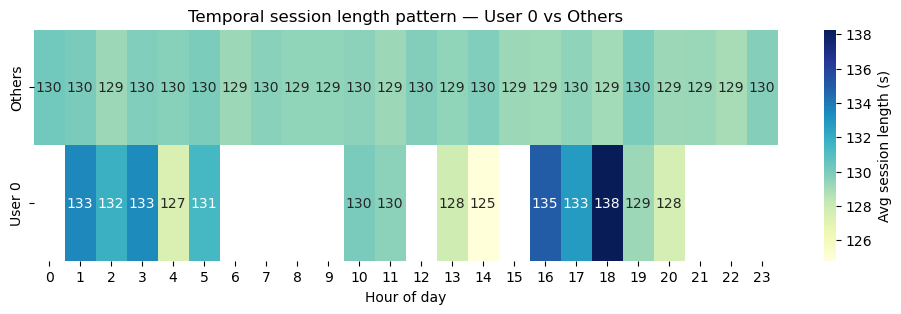

hour           0           1           2           3           4           5   \
group                                                                           
Others  130.24116  130.010235  129.214273  129.824570  129.661177  129.932084   
User 0        NaN  133.484551  131.799666  133.422031  127.379679  131.401442   

hour            6           7           8           9   ...          14  \
group                                                   ...               
Others  129.209571  129.633527  129.478945  129.467071  ...  129.837554   
User 0         NaN         NaN         NaN         NaN  ...  124.802850   

hour            15          16          17          18          19  \
group                                                                
Others  129.190131  129.128828  129.533569  129.046795  129.909518   
User 0         NaN  135.008403  132.752885  138.270161  129.207240   

hour            20          21          22         23  
group                                                  
Others  129.183497  129.235584  128.918147  129.70677  
User 0  127.622624         NaN         NaN        NaN  

[2 rows x 24 columns]

In [66]:
plot_temporal_session_length(df_wide, 0, by="user_vs_others")

In [67]:
plot_temporal_session_length(df_wide, 0, by="site")

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/3314820879.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long["hour"] = pd.to_datetime(df_long["time"], errors="coerce").dt.hour


hour                 1      2   3   4      5     10     11  13    14  16  \
site                                                                       
1040.com            NaN    NaN NaN NaN    NaN   NaN  137.0 NaN   NaN NaN   
10footwave.com      NaN    NaN NaN NaN  220.0   NaN    NaN NaN   NaN NaN   
10marifet.org       NaN    NaN NaN NaN    NaN   NaN    NaN NaN   NaN NaN   
1105edata.com       NaN    NaN NaN NaN    NaN  84.0    NaN NaN   NaN NaN   
123movie.digital    NaN    NaN NaN NaN    NaN   NaN    NaN NaN   NaN NaN   
...                 ...    ...  ..  ..    ...   ...    ...  ..   ...  ..   
zorkanetwork.com    NaN    NaN NaN NaN    NaN   NaN    NaN NaN  51.0 NaN   
zscalerone.net      NaN  104.0 NaN NaN    NaN   NaN    NaN NaN   NaN NaN   
zum.de              NaN   62.0 NaN NaN    NaN   NaN    NaN NaN   NaN NaN   
zzbabes.com       211.0    NaN NaN NaN    NaN   NaN    NaN NaN   NaN NaN   
zzperform.com       NaN    NaN NaN NaN   64.0   NaN    NaN NaN   NaN NaN   

hour                 17  18     19  20  
site                                    
1040.com            NaN NaN    NaN NaN  
10footwave.com      NaN NaN    NaN NaN  
10marifet.org       NaN NaN  109.0 NaN  
1105edata.com       NaN NaN    NaN NaN  
123movie.digital  135.0 NaN    NaN NaN  
...                 ...  ..    ...  ..  
zorkanetwork.com    NaN NaN    NaN NaN  
zscalerone.net      NaN NaN    NaN NaN  
zum.de              NaN NaN    NaN NaN  
zzbabes.com         NaN NaN    NaN NaN  
zzperform.com       NaN NaN    NaN NaN  

[1515 rows x 14 columns]

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_attention_concentration(df_wide, target_id):
    """
    Plot Lorenz curve of attention concentration (time spent across sites).
    Compares one user vs population average.
    """
    # ---- 1) Wide -> Long
    site_cols   = [c for c in df_wide.columns if c.startswith("site_")]
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    base_cols   = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]

    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site", "length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index().dropna(subset=["site", "length"])

    df_long["length"] = pd.to_numeric(df_long["length"], errors="coerce")
    df_long = df_long[df_long["length"] > 0]

    # ---- 2) Compute Lorenz curve helper
    def lorenz_curve(time_series):
        """Return cumulative site share (x), cumulative time share (y)."""
        values = time_series.sort_values(ascending=False).values
        cum_time = np.cumsum(values) / values.sum()
        cum_sites = np.arange(1, len(values)+1) / len(values)
        return cum_sites, cum_time

    # ---- 3) User Lorenz
    user_df = df_long[df_long["user_id"] == target_id]
    if user_df.empty:
        raise ValueError(f"No visits for user_id={target_id}")

    user_time = user_df.groupby("site")["length"].sum()
    x_user, y_user = lorenz_curve(user_time)

    # ---- 4) Population average Lorenz
    other_df = df_long[df_long["user_id"] != target_id]
    pop_curves = []
    for uid, sub in other_df.groupby("user_id"):
        site_time = sub.groupby("site")["length"].sum()
        if site_time.sum() > 0:
            x, y = lorenz_curve(site_time)
            # Interpolate to 100 evenly spaced site-percentiles
            xi = np.linspace(0, 1, 100)
            yi = np.interp(xi, x, y)
            pop_curves.append(yi)
    pop_mean = np.mean(pop_curves, axis=0)
    xi = np.linspace(0, 1, 100)

    # ---- 5) Plot
    plt.figure(figsize=(6,6))
    plt.plot(x_user, y_user, label=f"User {target_id}", color="red", linewidth=2)
    plt.plot(xi, pop_mean, label="Population avg", color="blue", linestyle="--")
    plt.plot([0,1],[0,1], color="black", linestyle=":", label="Perfect equality")
    plt.xlabel("Cumulative share of sites")
    plt.ylabel("Cumulative share of time spent")
    plt.title("Attention concentration (Lorenz curve)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return x_user, y_user, xi, pop_mean


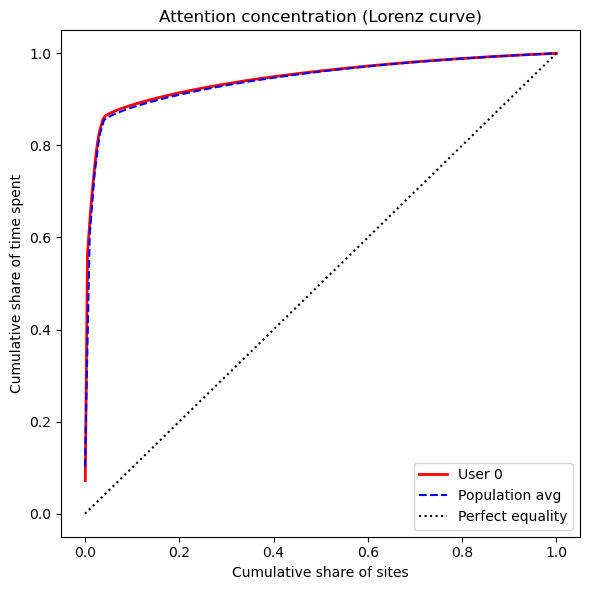

(array([6.60066007e-04, 1.32013201e-03, 1.98019802e-03, ...,
        9.98679868e-01, 9.99339934e-01, 1.00000000e+00], shape=(1515,)),
 array([0.07187778, 0.1437541 , 0.2152755 , ..., 0.99994182, 0.99997091,
        1.        ], shape=(1515,)),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        

In [69]:
plot_attention_concentration(df_wide, 0)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_session_length_variability(df_wide, target_id, top_n=10, min_user_visits=3, min_other_visits=20):
    """
    Visualize session length variability for a target user.
    - Boxplot: user's session lengths per site
    - Table: variability vs population
    """
    # ---- 1) Wide -> Long
    site_cols   = [c for c in df_wide.columns if c.startswith("site_")]
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    base_cols   = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]

    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site", "length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index().dropna(subset=["site", "length"])

    df_long["length"] = pd.to_numeric(df_long["length"], errors="coerce")
    df_long = df_long[df_long["length"] > 0]

    # ---- 2) Split user vs others
    user_df = df_long[df_long["user_id"] == target_id]
    other_df = df_long[df_long["user_id"] != target_id]

    if user_df.empty:
        raise ValueError(f"No visits for user_id={target_id}")

    # ---- 3) Variability stats
    user_stats = user_df.groupby("site")["length"].agg(["mean","std","count"]).rename(columns={"count":"user_visits"})
    other_stats = other_df.groupby("site")["length"].agg(["mean","std","count"]).rename(columns={"count":"others_visits"})

    comp = user_stats.join(other_stats, how="inner", lsuffix="_user", rsuffix="_others")

    # Filter for stable sites
    comp = comp[(comp["user_visits"] >= min_user_visits) & (comp["others_visits"] >= min_other_visits)]

    if comp.empty:
        raise ValueError("No sites pass the visit thresholds. Lower min_user_visits or min_other_visits.")

    # Add coefficient of variation
    comp["cv_user"]   = comp["std_user"] / comp["mean_user"]
    comp["cv_others"] = comp["std_others"] / comp["mean_others"]

    # Top sites by user visits
    top_sites = user_df["site"].value_counts().head(top_n).index
    comp_top = comp.loc[comp.index.intersection(top_sites)]

    # ---- 4a) Boxplot for session length distributions (user only)
    plt.figure(figsize=(10,6))
    sns.boxplot(data=user_df[user_df["site"].isin(comp_top.index)],
                x="site", y="length")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Session length (s)")
    plt.title(f"Session length variability (boxplot) — User {target_id}")
    plt.tight_layout()
    plt.show()

    # ---- 4b) Compare variability metrics (bar chart of CV)
    comp_top_plot = comp_top.sort_values("cv_user", ascending=False).head(top_n)

    plt.figure(figsize=(10,6))
    bar_width = 0.35
    x = np.arange(len(comp_top_plot))
    plt.bar(x, comp_top_plot["cv_user"], width=bar_width, label=f"User {target_id}")
    plt.bar(x+bar_width, comp_top_plot["cv_others"], width=bar_width, label="Others")
    plt.xticks(x+bar_width/2, comp_top_plot.index, rotation=45, ha="right")
    plt.ylabel("Coefficient of Variation (std/mean)")
    plt.title("Session length variability — User vs Population")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return comp_top.reset_index().rename(columns={"index":"site"})


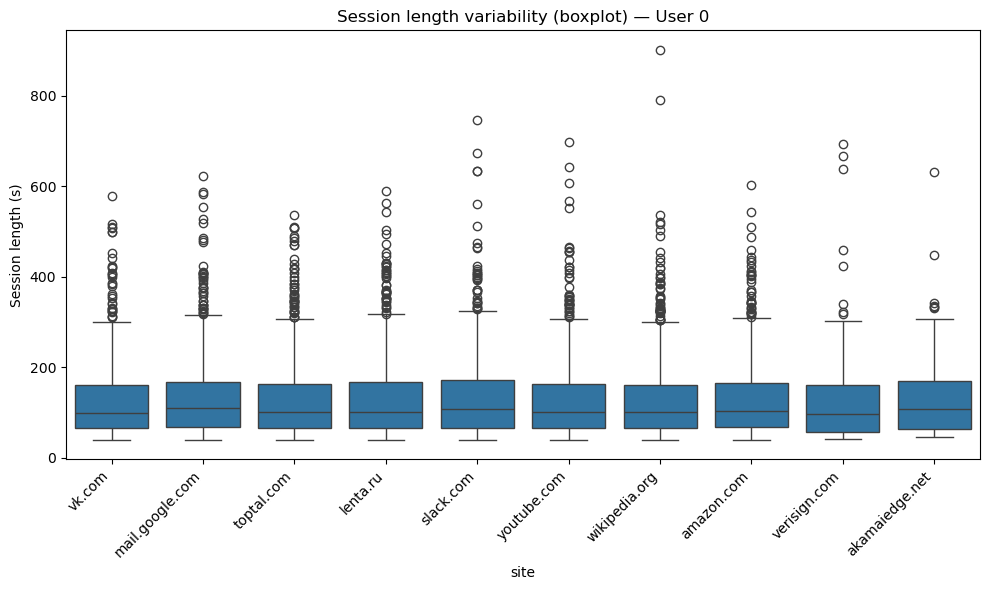

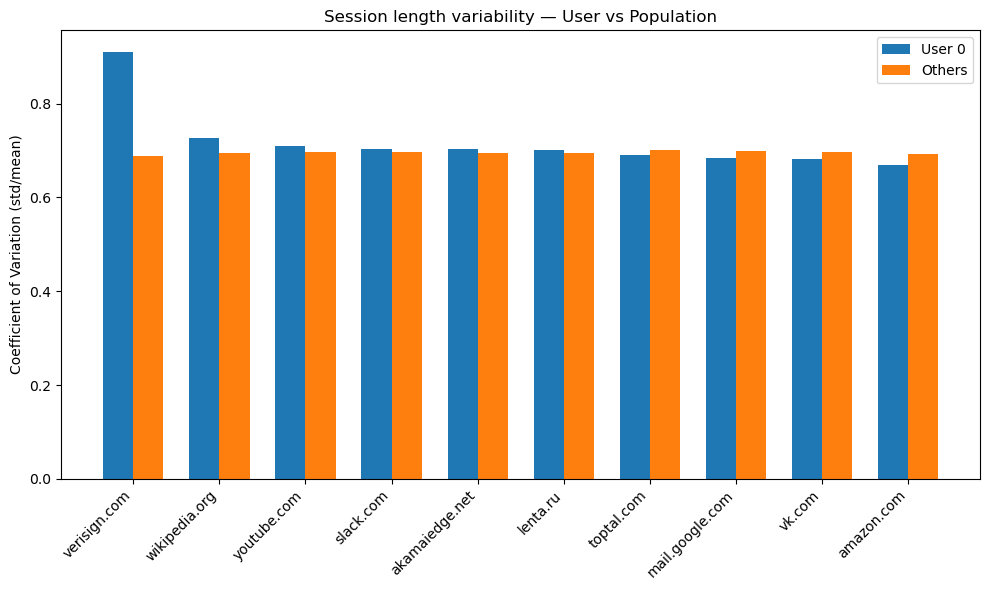

site   mean_user    std_user  user_visits  mean_others  \
0   akamaiedge.net  136.054545   95.557355          110   129.742012   
1       amazon.com  130.898013   87.508386          755   129.097692   
2         lenta.ru  132.415094   92.739999          742   130.649148   
3  mail.google.com  135.123967   92.399842          726   129.779152   
4        slack.com  133.614130   94.041635          736   129.281666   
5       toptal.com  130.784044   90.273239          727   130.179291   
6     verisign.com  134.412844  122.441763          109   130.208241   
7           vk.com  126.892758   86.460758          718   129.529353   
8    wikipedia.org  131.422872   95.394001          752   129.587288   
9      youtube.com  129.468793   91.876317          721   129.583572   

   std_others  others_visits   cv_user  cv_others  
0   90.284116          28575  0.702346   0.695874  
1   89.530923         153380  0.668523   0.693513  
2   90.804344          43286  0.700373   0.695024  
3   90.785864          44234  0.683815   0.699541  
4   90.140030          43651  0.703830   0.697238  
5   91.170356          36689  0.690247   0.700345  
6   89.777516          29317  0.910938   0.689492  
7   90.186389          55821  0.681369   0.696262  
8   90.145934         150352  0.725855   0.695639  
9   90.218802          44315  0.709641   0.696221

In [71]:
plot_session_length_variability(df_wide, 0, top_n=10, min_user_visits=3, min_other_visits=20)

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_session_length_user_vs_others(
    df_wide,
    target_id=0,
    log_scale=False,
    show_ecdf=True,
    show_box=True,
    min_length=0
):
    """
    Compare session length distribution (sum of length_* per session)
    for one user vs everyone else.
    """
    # ---- 1) Compute total session length per row (sum of length_*)
    length_cols = [c for c in df_wide.columns if c.startswith("length_")]
    # Coerce to numeric and sum across row
    lengths = df_wide[length_cols].apply(pd.to_numeric, errors="coerce")
    total_len = lengths.sum(axis=1, skipna=True)

    # Optional filter for any weird zeros/negatives
    total_len = total_len.fillna(0)
    mask_valid = total_len >= min_length

    # Split user vs others
    mask_user = (df_wide["user_id"] == target_id)
    user_len   = total_len[mask_user & mask_valid].values
    other_len  = total_len[~mask_user & mask_valid].values

    if user_len.size == 0 or other_len.size == 0:
        raise ValueError("No valid lengths for user or others after filtering.")

    # ---- 2) Overlaid normalized histograms
    # Use shared bins computed from the combined data
    all_vals = np.concatenate([user_len, other_len])
    bins = np.histogram_bin_edges(all_vals, bins="auto")

    plt.figure(figsize=(10,5))
    plt.hist(other_len, bins=bins, density=True, alpha=0.55, label="Others")
    plt.hist(user_len,  bins=bins, density=True, alpha=0.75, label=f"User {target_id}")
    if log_scale:
        plt.xscale("log")
        plt.xlabel("Total session length (log scale)")
    else:
        plt.xlabel("Total session length")
    plt.ylabel("Density")
    plt.title(f"Session length distribution — User {target_id} vs Others")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---- 3) ECDFs (optional)
    def ecdf(x):
        x = np.sort(x)
        y = np.arange(1, x.size+1) / x.size
        return x, y

    if show_ecdf:
        x_u, y_u = ecdf(user_len)
        x_o, y_o = ecdf(other_len)

        plt.figure(figsize=(10,5))
        plt.plot(x_o, y_o, drawstyle="steps-post", label="Others")
        plt.plot(x_u, y_u, drawstyle="steps-post", label=f"User {target_id}")
        if log_scale:
            plt.xscale("log")
            plt.xlabel("Total session length (log scale)")
        else:
            plt.xlabel("Total session length")
        plt.ylabel("ECDF")
        plt.title("Empirical CDF — lower curve to the right ⇒ longer sessions")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # ---- 4) Boxplot (optional)
    if show_box:
        plt.figure(figsize=(8,5))
        data = [other_len, user_len]
        plt.boxplot(data, labels=["Others", f"User {target_id}"], showfliers=False)
        if log_scale:
            plt.yscale("log")
            plt.ylabel("Total session length (log scale)")
        else:
            plt.ylabel("Total session length")
        plt.title("Session length summary")
        plt.tight_layout()
        plt.show()

    # ---- 5) Print summary stats
    def summarize(x):
        return {
            "n": x.size,
            "mean": float(np.mean(x)),
            "median": float(np.median(x)),
            "p90": float(np.percentile(x, 90)),
            "p99": float(np.percentile(x, 99))
        }
    stats_user  = summarize(user_len)
    stats_other = summarize(other_len)

    print("Others:", stats_other)
    print(f"User {target_id}:", stats_user)
    # Simple effect estimate
    diff_median = stats_user["median"] - stats_other["median"]
    print(f"Δ median (User - Others): {diff_median:.2f}")


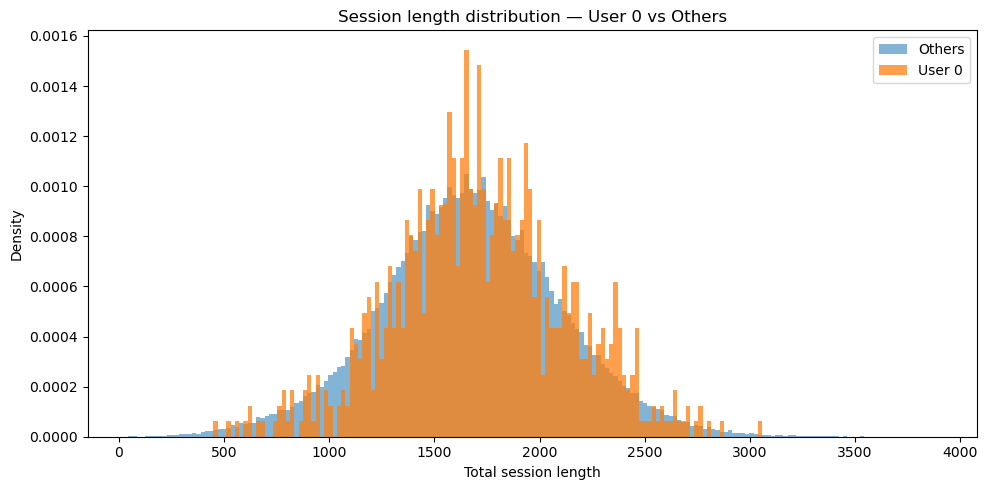

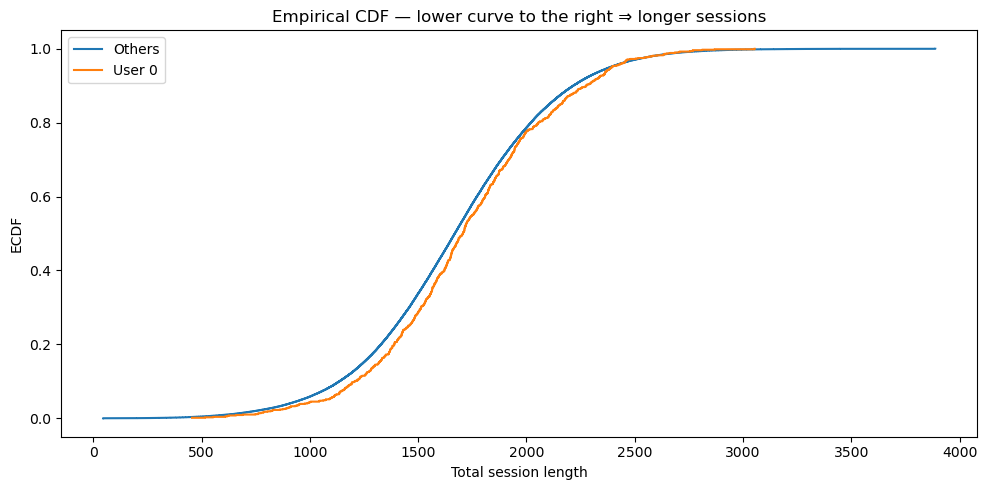

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/73490960.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Others", f"User {target_id}"], showfliers=False)


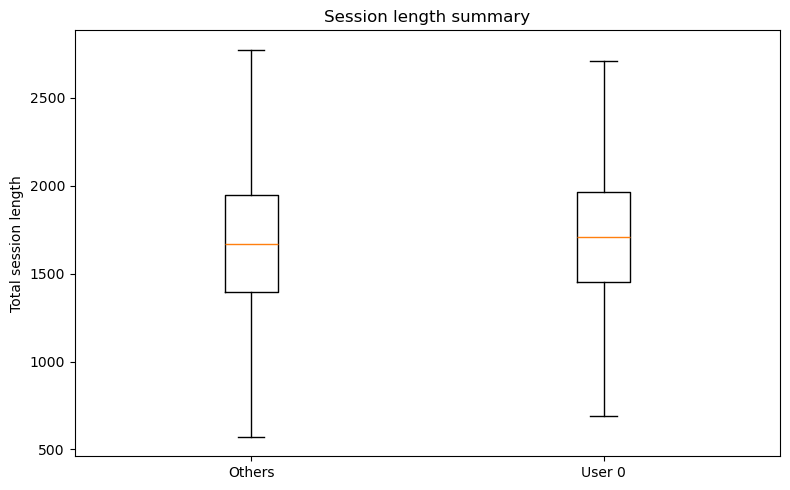

Others: {'n': 159200, 'mean': 1672.2634547738694, 'median': 1669.0, 'p90': 2216.0, 'p99': 2712.0}
User 0: {'n': 800, 'mean': 1718.71625, 'median': 1707.0, 'p90': 2276.1, 'p99': 2685.1899999999996}
Δ median (User - Others): 38.00


In [229]:
plot_session_length_user_vs_others(df_wide, target_id=0)

#plot_session_length_user_vs_others(df_wide, target_id=0, log_scale=True)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_time_weighted_site_profile(
    df_wide,
    target_id,
    top_n=12,
    min_user_visits=2,
    min_other_visits=20,
    show_ratio=True
):
    """
    Visualize how a user's total browsing TIME is distributed across sites vs the population.

    - Bars show time SHARE per site (User vs Others) for the top_n sites with the largest (user - others) share.
    - Optionally shows a second chart with over/under-indexing by TIME:
        time_ratio = user_time_share / others_time_share

    Parameters
    ----------
    df_wide : pd.DataFrame  # wide schema with site_#, length_#
    target_id : any         # user_id to analyze
    top_n : int             # number of sites to display
    min_user_visits : int   # require at least this many user visits to the site
    min_other_visits : int  # require at least this many population visits to the site
    show_ratio : bool       # also plot time over/under-indexing ratios
    """
    # ---- 1) Wide -> Long
    base_cols = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]
    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site","length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index()

    # Clean
    df_long = df_long.dropna(subset=["site", "length"])
    df_long["length"] = pd.to_numeric(df_long["length"], errors="coerce")
    df_long = df_long[df_long["length"] > 0]

    # ---- 2) Split
    user_mask = df_long["user_id"] == target_id
    user_df   = df_long[user_mask].copy()
    other_df  = df_long[~user_mask].copy()
    if user_df.empty:
        raise ValueError(f"No visits for user_id={target_id}")

    # ---- 3) Totals and visit counts
    user_time   = user_df.groupby("site")["length"].sum().rename("user_time")
    user_visits = user_df.groupby("site")["length"].size().rename("user_visits")

    others_time   = other_df.groupby("site")["length"].sum().rename("others_time")
    others_visits = other_df.groupby("site")["length"].size().rename("others_visits")

    comp = pd.concat([user_time, user_visits, others_time, others_visits], axis=1).fillna(0)

    # ---- 4) Convert to shares (time-based)
    total_user_time   = comp["user_time"].sum()
    total_others_time = comp["others_time"].sum()
    if total_user_time == 0 or total_others_time == 0:
        raise ValueError("User or population has zero total time after cleaning.")

    comp["user_share_time"]   = comp["user_time"]   / total_user_time
    comp["others_share_time"] = comp["others_time"] / total_others_time

    # Filters for stability
    comp = comp[
        (comp["user_visits"]   >= min_user_visits) &
        (comp["others_visits"] >= min_other_visits)
    ]

    if comp.empty:
        raise ValueError("No sites pass visit thresholds. Lower min_user_visits/min_other_visits.")

    # ---- 5) Ranking by time-share difference
    comp["diff_share_time"] = comp["user_share_time"] - comp["others_share_time"]
    top = comp.sort_values("diff_share_time", ascending=False).head(top_n)

    # ---- 6) Plot: Time-share comparison
    plt.figure(figsize=(10, 6))
    x = np.arange(len(top))
    bar_w = 0.4

    plt.bar(x, top["user_share_time"], width=bar_w, label=f"User {target_id}")
    plt.bar(x + bar_w, top["others_share_time"], width=bar_w, label="Others")

    plt.xticks(x + bar_w/2, top.index, rotation=45, ha="right")
    plt.ylabel("Share of total browsing time")
    plt.title(f"Time-weighted site profile — User {target_id} vs Others (Top by Δ share)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---- 7) Optional: Over/under-indexing by TIME
    out = top.copy()
    if show_ratio:
        comp["time_ratio"] = comp["user_share_time"] / comp["others_share_time"].replace(0, np.nan)
        top_ratio = comp.dropna(subset=["time_ratio"]).sort_values("time_ratio", ascending=False).head(top_n)

        plt.figure(figsize=(10, 6))
        plt.bar(top_ratio.index, top_ratio["time_ratio"])
        plt.axhline(1, linestyle="--")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Over/Under-indexing by TIME (ratio)")
        plt.title(f"Signature sites by TIME — User {target_id} (time_share_user / time_share_others)")
        plt.tight_layout()
        plt.show()

        out = out.join(comp["time_ratio"], how="left")

    # ---- 8) Return tidy summary
    out = out.reset_index().rename(columns={"index":"site"})
    cols = ["site","user_time","others_time","user_visits","others_visits",
            "user_share_time","others_share_time","diff_share_time"]
    if "time_ratio" in out.columns:
        cols.append("time_ratio")
    return out[cols]


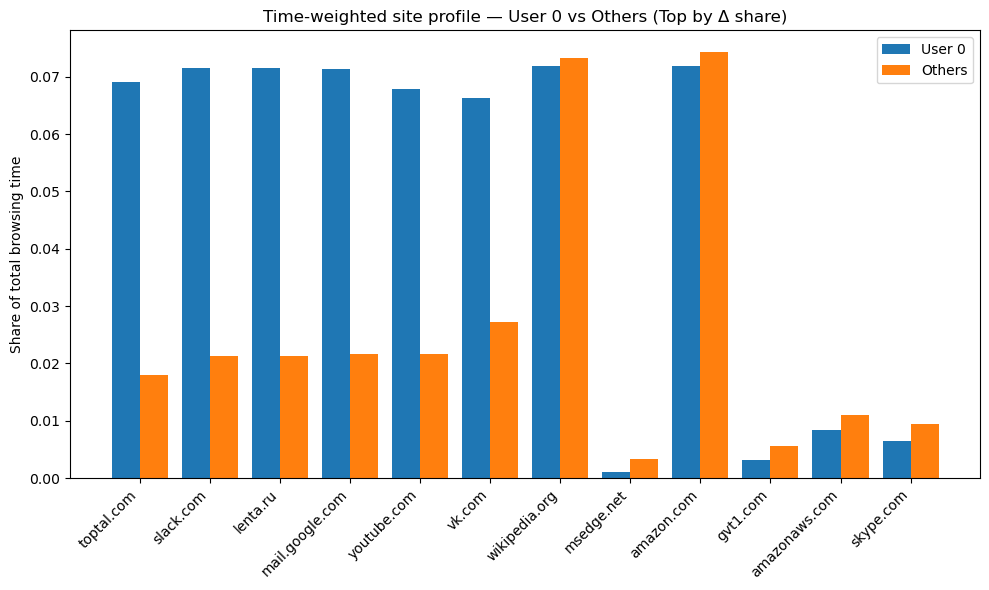

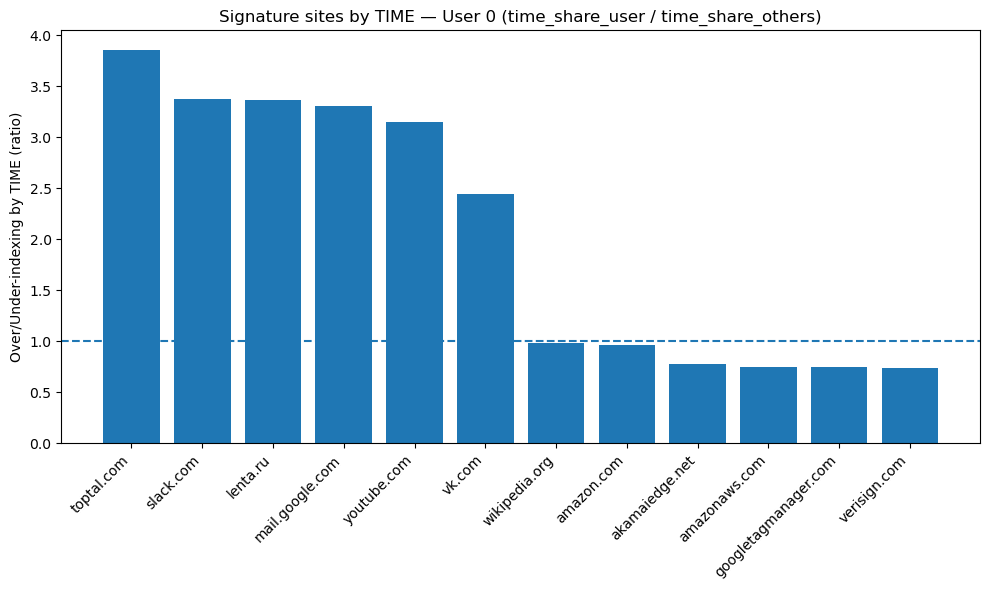

site  user_time  others_time  user_visits  others_visits  \
0       toptal.com    95080.0    4776148.0        727.0        36689.0   
1        slack.com    98340.0    5643274.0        736.0        43651.0   
2         lenta.ru    98252.0    5655279.0        742.0        43286.0   
3  mail.google.com    98100.0    5740651.0        726.0        44234.0   
4      youtube.com    93347.0    5742496.0        721.0        44315.0   

   user_share_time  others_share_time  diff_share_time  time_ratio  
0         0.069150           0.017940         0.051210    3.854473  
1         0.071521           0.021197         0.050324    3.374059  
2         0.071457           0.021243         0.050215    3.363884  
3         0.071347           0.021563         0.049784    3.308731  
4         0.067890           0.021570         0.046320    3.147410

In [74]:
summary = plot_time_weighted_site_profile(df_wide, target_id=0, top_n=12, min_user_visits=2, min_other_visits=30, show_ratio=True)
summary.head()


In [79]:
df_wide.date.max()

'2019-06-18'

In [83]:
df_wide[df_wide.user_id==0].date.unique()

array(['2016-04-13', '2018-02-23', '2016-06-21', '2016-01-24',
       '2017-08-15', '2018-04-10', '2018-02-14', '2018-01-10',
       '2018-07-28', '2017-11-14', '2016-10-03', '2017-11-28',
       '2018-11-03', '2017-04-04', '2016-10-20', '2016-11-19',
       '2017-07-28', '2017-09-01', '2016-05-29', '2017-06-02',
       '2018-06-16', '2017-01-31', '2017-12-06', '2018-02-05',
       '2018-08-06', '2018-11-24', '2018-11-07', '2016-12-02',
       '2017-03-04', '2016-06-12', '2016-02-29', '2018-09-02',
       '2016-05-03', '2016-10-12', '2017-12-27', '2016-11-17',
       '2018-01-12', '2016-02-10', '2018-01-28', '2019-01-21',
       '2017-04-09', '2018-10-02', '2018-09-09', '2019-03-12',
       '2019-02-03', '2017-08-13', '2016-02-26', '2017-12-10',
       '2016-07-22', '2016-08-15', '2017-01-22', '2018-03-27',
       '2017-02-15', '2016-12-10', '2019-01-16', '2017-10-17',
       '2018-06-03', '2017-11-29', '2017-06-23', '2016-06-23',
       '2016-08-17', '2018-08-10', '2016-06-06', '2017-

In [252]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from math import log

def plot_user_session_cooccurrence_clean(
    df_wide,
    target_id,
    top_n=20,                 # consider top-N sites by frequency for this user
    min_support=3,            # min #sessions pair must co-occur
    edge_metric="jaccard",    # 'support'|'jaccard'|'lift'|'pmi'
    top_k_edges=200,          # keep only top-K strongest edges overall (after metric)
    top_k_per_node=10,        # cap edges per node to its top-K by score
    label_top_n=20,           # label only top-N nodes by degree
    layout_k=0.5,             # spring layout spacing (higher => more spread)
    figsize=(7,7),
    save_path=None,          # <-- NEW: where to save (e.g. "user0_cooccurrence.png")
    dpi=300,                 # <-- NEW: export resolution
    transparent=False,       # <-- NEW: transparent background if you want
    show=True                # <-- NEW: whether to show the plot inline
):

    """
    Cleaner co-occurrence network for user target_id with scoring + pruning.
    """
    # ---- 1) Wide -> Long
    base_cols = [c for c in df_wide.columns if not c.startswith(("site_", "length_"))]
    df_long = pd.wide_to_long(
        df_wide,
        stubnames=["site","length"],
        i=base_cols,
        j="visit",
        sep="_",
        suffix=r"\d+"
    ).reset_index()
    df_long = df_long.dropna(subset=["site"])

    # ---- 2) Identify sessions for the user
    # NOTE: if you have a session_id column, use that instead of 'date'
    user_long = df_long[df_long["user_id"] == target_id].copy()
    if user_long.empty:
        raise ValueError(f"No rows for user_id={target_id}")

    # Session ids (use index of original rows if available; fallback to date)
    # If multiple sessions share same date, consider combining date+time or use df_wide index.
    if "session_id" in user_long.columns:
        sess_col = "session_id"
    else:
        # safer: reconstruct session id as combination of original wide row index if present
        # wide_to_long stored original index columns in 'base_cols'; try to locate an index-like col
        # Fallback: date + time (still imperfect if multiple sessions same timestamp)
        sess_col = "date"
    sessions = user_long.groupby(sess_col)["site"].apply(list)

    # ---- 3) Site frequencies & co-occurrences
    # Restrict to top-N sites by frequency for this user to keep the graph small
    site_freq = user_long["site"].value_counts()
    keep_sites = set(site_freq.head(top_n).index)

    # Count co-occurrences across sessions
    co_counts = {}
    for sites in sessions:
        s = list(set([x for x in sites if x in keep_sites]))  # unique sites per session
        for a, b in combinations(sorted(s), 2):
            co_counts[(a,b)] = co_counts.get((a,b), 0) + 1

    if not co_counts:
        raise ValueError("No co-occurrences found with current filters; lower constraints.")

    co_df = pd.DataFrame(
        [(a,b,w) for (a,b), w in co_counts.items()],
        columns=["site_a","site_b","support"]
    )

    # Only pairs meeting min_support
    co_df = co_df[co_df["support"] >= min_support]
    if co_df.empty:
        raise ValueError("No co-occurrences after min_support; lower min_support or increase top_n.")

    # Marginal counts: in how many sessions each site appears (user-only)
    # Treat presence/absence per session (not total visits)
    site_in_sessions = {}
    for site in keep_sites:
        site_in_sessions[site] = sum(site in set(x) for x in sessions)

    n_sessions = len(sessions)

    # ---- 4) Edge scoring
    def jaccard(a,b):
        ab = co_df.loc[(co_df["site_a"]==a)&(co_df["site_b"]==b), "support"].values[0]
        ua = site_in_sessions[a]; ub = site_in_sessions[b]
        return ab / (ua + ub - ab + 1e-9)

    def lift(a,b):
        ab = co_df.loc[(co_df["site_a"]==a)&(co_df["site_b"]==b), "support"].values[0]
        ua = site_in_sessions[a]; ub = site_in_sessions[b]
        # P(a,b) / (P(a)P(b)) = (ab/n) / ((ua/n)(ub/n)) = ab*n / (ua*ub)
        return (ab * n_sessions) / (ua * ub + 1e-9)

    def pmi(a,b):
        ab = co_df.loc[(co_df["site_a"]==a)&(co_df["site_b"]==b), "support"].values[0]
        ua = site_in_sessions[a]; ub = site_in_sessions[b]
        val = (ab * n_sessions) / (ua * ub + 1e-9)
        return log(max(val, 1e-9), 2)  # log2

    if edge_metric == "support":
        co_df["score"] = co_df["support"].astype(float)
    elif edge_metric == "jaccard":
        co_df["score"] = [jaccard(a,b) for a,b in co_df[["site_a","site_b"]].itertuples(index=False, name=None)]
    elif edge_metric == "lift":
        co_df["score"] = [lift(a,b) for a,b in co_df[["site_a","site_b"]].itertuples(index=False, name=None)]
    elif edge_metric == "pmi":
        co_df["score"] = [pmi(a,b) for a,b in co_df[["site_a","site_b"]].itertuples(index=False, name=None)]
    else:
        raise ValueError("edge_metric must be 'support', 'jaccard', 'lift', or 'pmi'")

    # ---- 5) Global pruning (top-K strongest edges)
    co_df = co_df.sort_values("score", ascending=False)
    if top_k_edges is not None and len(co_df) > top_k_edges:
        co_df = co_df.head(top_k_edges)

    # ---- 6) Degree pruning (top-K edges per node)
    if top_k_per_node is not None:
        # Keep only each node's top-K edges by score
        kept = []
        by_node = {}
        for _, row in co_df.iterrows():
            a, b, s = row["site_a"], row["site_b"], row["score"]
            by_node.setdefault(a, []).append((s, _))
            by_node.setdefault(b, []).append((s, _))
        # Mark rows to keep based on per-node caps
        keep_rows = set()
        for node, items in by_node.items():
            items.sort(reverse=True)
            for _, idx in items[:top_k_per_node]:
                keep_rows.add(idx)
        co_df = co_df.loc[sorted(keep_rows)]

    # ---- 7) Build graph with node attributes
    G = nx.Graph()
    # Node size by how many user sessions contained that site
    for s in keep_sites:
        if site_in_sessions.get(s, 0) > 0:
            G.add_node(s, freq=site_in_sessions[s])

    for _, r in co_df.iterrows():
        a, b, w, score = r["site_a"], r["site_b"], r["support"], r["score"]
        if a in G and b in G:
            G.add_edge(a, b, support=int(w), score=float(score))

    # Remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))
    if G.number_of_edges() == 0:
        raise ValueError("All edges pruned; relax pruning params.")

    # ---- 8) Community detection for coloring
    try:
        comms = list(nx.algorithms.community.greedy_modularity_communities(G))
        comm_map = {}
        for ci, com in enumerate(comms):
            for n in com:
                comm_map[n] = ci
        node_colors = [comm_map[n] for n in G.nodes()]
    except Exception:
        node_colors = "lightblue"

    # ---- 9) Layout + drawing
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, seed=42, k=layout_k, weight="score")

    # node sizes
    freqs = np.array([G.nodes[n].get("freq", 1) for n in G.nodes()])
    ns = 300 + 60 * np.sqrt(freqs)  # sublinear scaling

    # edges: width/alpha by normalized score
    scores = np.array([G[u][v]["score"] for u,v in G.edges()])
    if scores.max() > 0:
        s_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
    else:
        s_norm = np.ones_like(scores)
    widths = 0.5 + 3.5 * s_norm
    alphas = 0.2 + 0.6 * s_norm

    # draw edges in batches to vary alpha
    for (u, v), w, a in zip(G.edges(), widths, alphas):
        nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], width=w, alpha=a)

    # draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=ns, node_color=node_colors, cmap="tab10", linewidths=0.8, edgecolors="#333")

    # label only top-degree nodes
    deg = dict(G.degree())
    top_labels = set(sorted(deg, key=deg.get, reverse=True)[:label_top_n])
    labels = {n: (n if n in top_labels else "") for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)

    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, seed=42, k=layout_k, weight="score")
    # (draw edges & nodes exactly as before)

    plt.title(f"User {target_id}: Co-occurring sites (scored={edge_metric}, pruned)")
    plt.axis("off")
    plt.tight_layout()

    # --- SAVE/SHOW ---
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.1, transparent=transparent)
        print(f"Saved figure to: {save_path}")
    if show:
        plt.show()
    else:
        plt.close()

    out = nx.to_pandas_edgelist(G).rename(columns={"source":"site_a","target":"site_b"})
    return out.sort_values("score", ascending=False)


Saved figure to: user0_cooccurrence.png


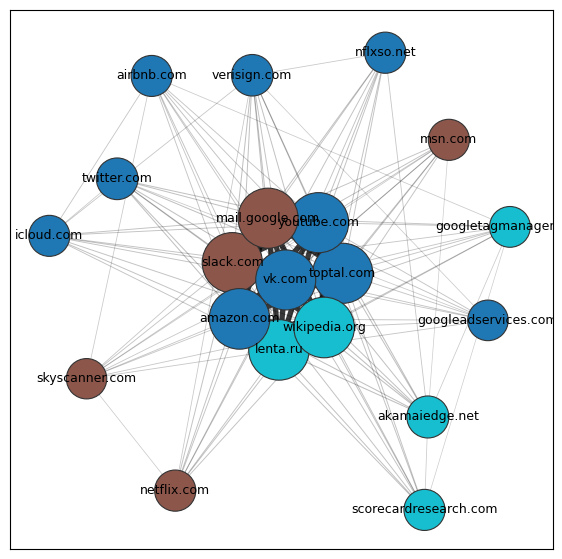

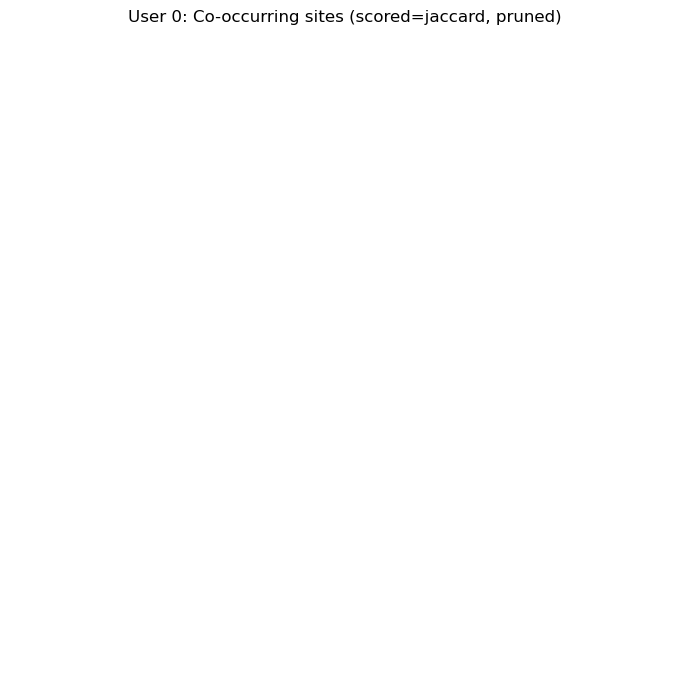

In [253]:
edges = plot_user_session_cooccurrence_clean(
    df_wide,
    target_id=0, # the user you're analyzing
    save_path="user0_cooccurrence.png" 
)


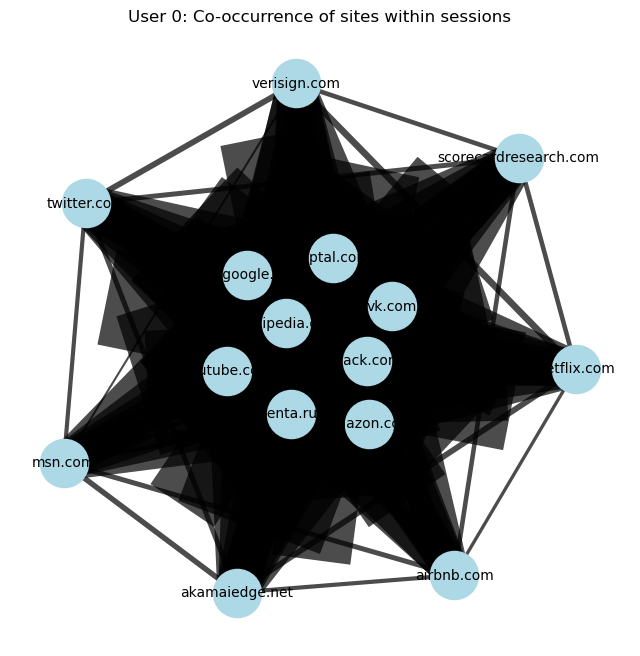

site_a         site_b  weight
103  amazon.com  wikipedia.org     686
13   amazon.com       lenta.ru     681
11     lenta.ru  wikipedia.org     679
49   amazon.com      slack.com     669
47    slack.com  wikipedia.org     666

In [86]:
co_matrix = plot_user_session_cooccurrence(df_wide, target_id=0, top_n=15, min_support=5)
co_matrix.head()

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_global_site_occurrences(df_wide, top_n=20):
    # Collect all site columns
    site_cols = [c for c in df_wide.columns if c.startswith("site_")]

    # Stack all sites into one Series
    all_sites = df_wide[site_cols].stack().dropna()
    all_sites = all_sites[all_sites.str.lower() != "none"]

    # Count frequencies
    site_counts = all_sites.value_counts()

    # Plot top N
    top = site_counts.head(top_n)
    plt.figure(figsize=(10,6))
    top.plot(kind="bar", color="steelblue", edgecolor="black")
    plt.ylabel("Occurrences (sessions × sites)")
    plt.title(f"Top {top_n} sites across all users")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    return site_counts


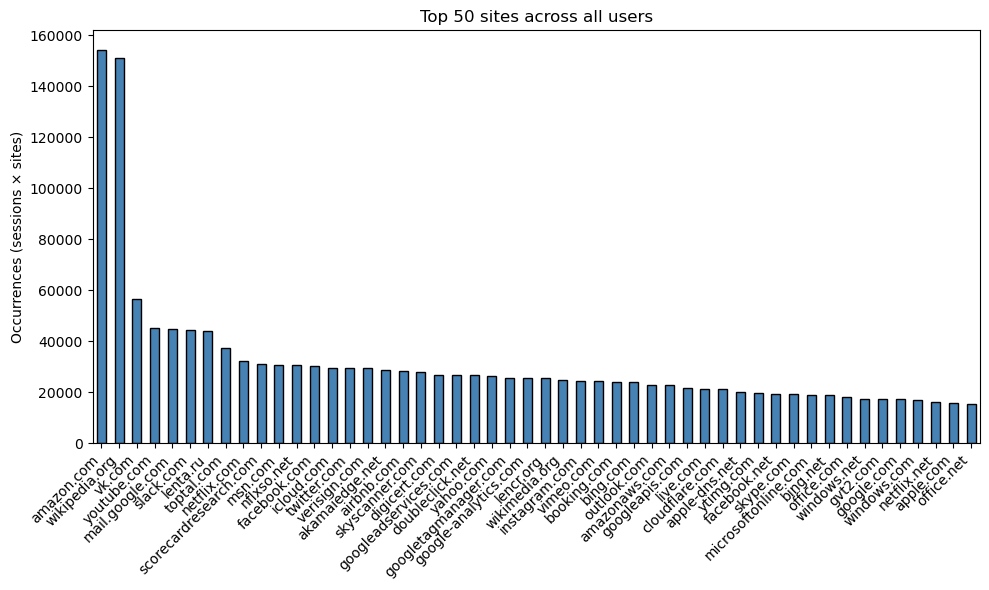

amazon.com               154135
wikipedia.org            151104
vk.com                    56539
youtube.com               45036
mail.google.com           44960
slack.com                 44387
lenta.ru                  44028
toptal.com                37416
netflix.com               32274
scorecardresearch.com     31108
Name: count, dtype: int64

In [95]:
site_counts = plot_global_site_occurrences(df_wide, top_n=50)
site_counts.head(10)

In [217]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

class SessionFeatureEngineer:
    """
    One row = one session. Builds session-level features:
      - Site TF-IDF (session as 'document' of sites)
      - User-0 signature site flags (binary)
      - Time features (hour, DOW, month, night flag, cyclic hour)
      - Session length stats from length_1..length_15
      - Meta OHE (locale, country, city, browser, os, gender)
    """
    def __init__(
        self,
        user0_id=0,
        max_tfidf_sites=5000,
        top_user_signature_sites=300,
        use_cyclic_time=True,
        night_hours=range(0,7)
    ):
        self.user0_id = user0_id
        self.max_tfidf_sites = max_tfidf_sites
        self.top_user_signature_sites = top_user_signature_sites
        self.use_cyclic_time = use_cyclic_time
        self.night_hours = set(night_hours)

        self.tfidf = TfidfVectorizer(max_features=max_tfidf_sites, token_pattern=r"[^ \t\n\r\f\v]+")
        self.ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)

        self.signature_sites_ = None
        self.site_cols_ = None
        self.length_cols_ = None
        self.cat_cols_ = ["locale","country","city","browser","os","gender"]
        self.time_cols_ = ["date","time"]

    # ---------- helpers ----------
    @staticmethod
    def _row_sites(row, site_cols):
        vals = [row[c] for c in site_cols if c in row and pd.notna(row[c]) and str(row[c]).lower() != "none"]
        return [str(s) for s in vals]

    @staticmethod
    def _row_lengths(row, length_cols):
        vals = [row[c] for c in length_cols if c in row and pd.notna(row[c])]
        arr = pd.to_numeric(pd.Series(vals), errors="coerce").dropna().values
        return arr

    def _sites_corpus(self, df):
        return df.apply(lambda r: " ".join(self._row_sites(r, self.site_cols_)), axis=1)

    def _build_signature_sites(self, df):
        # count sites in user0 rows only
        user_mask = (df.get("user_id") == self.user0_id)
        if user_mask is None or user_mask.sum() == 0:
            return []
        # flatten the user's site columns and count
        stacked = []
        for c in self.site_cols_:
            s = df.loc[user_mask, c].dropna()
            s = s[s.str.lower() != "none"]
            stacked.append(s.astype(str))
        all_sites = pd.concat(stacked, axis=0)
        top_sites = all_sites.value_counts().head(self.top_user_signature_sites).index.tolist()
        return top_sites

    def _signature_flags(self, df):
        if not self.signature_sites_:
            return sp.csr_matrix((df.shape[0], 0))
        sig_index = {s: i for i, s in enumerate(self.signature_sites_)}
        rows, cols, data = [], [], []
        for i, row in df.reset_index(drop=True).iterrows():  # <-- positional i
            sset = set(self._row_sites(row, self.site_cols_))
            for s in sset:
                j = sig_index.get(s)
                if j is not None:
                    rows.append(i)
                    cols.append(j)
                    data.append(1)
        return sp.csr_matrix((data, (rows, cols)),
                             shape=(df.shape[0], len(self.signature_sites_)),
                             dtype=np.int8)

    def _session_length_stats(self, df):
        # compute per-row stats from length_* columns
        stats = {
            "total_length": [],
            "mean_length": [],
            "median_length": [],
            "std_length": [],
            "max_length": [],
            "min_length": [],
            "n_sites": [],          # unique sites (ignores None/NaN)
            "n_visits": []          # number of non-null length entries
        }
        for _, row in df.iterrows():
            lens = self._row_lengths(row, self.length_cols_)
            sites = self._row_sites(row, self.site_cols_)
            if len(lens) == 0:
                stats["total_length"].append(0.0)
                stats["mean_length"].append(0.0)
                stats["median_length"].append(0.0)
                stats["std_length"].append(0.0)
                stats["max_length"].append(0.0)
                stats["min_length"].append(0.0)
                stats["n_sites"].append(len(set(sites)))
                stats["n_visits"].append(0)
            else:
                stats["total_length"].append(float(np.sum(lens)))
                stats["mean_length"].append(float(np.mean(lens)))
                stats["median_length"].append(float(np.median(lens)))
                stats["std_length"].append(float(np.std(lens)))
                stats["max_length"].append(float(np.max(lens)))
                stats["min_length"].append(float(np.min(lens)))
                stats["n_sites"].append(len(set(sites)))
                stats["n_visits"].append(len(lens))
        return pd.DataFrame(stats, index=df.index)

    def _time_features(self, df):
        out = pd.DataFrame(index=df.index)
        # parse
        dt_date = pd.to_datetime(df["date"], errors="coerce")
        dt_time = pd.to_datetime(df["time"], errors="coerce").dt.time

        # hour
        hour = pd.to_datetime(df["time"], errors="coerce").dt.hour.fillna(-1).astype(int)
        out["hour"] = hour
        out["dow"] = dt_date.dt.dayofweek.fillna(-1).astype(int)
        out["month"] = dt_date.dt.month.fillna(-1).astype(int)
        out["is_night"] = out["hour"].isin(self.night_hours).astype(int)

        if self.use_cyclic_time:
            # map hour -1 (invalid) to 0 for sin/cos (effect is small and encoder will also have raw hour column)
            hr = out["hour"].clip(lower=0)
            out["hour_sin"] = np.sin(2*np.pi*hr/24.0)
            out["hour_cos"] = np.cos(2*np.pi*hr/24.0)

        return out

    # ---------- public API ----------
    def fit(self, df_train: pd.DataFrame):
        # detect site/length columns
        self.site_cols_ = [c for c in df_train.columns if c.startswith("site_")]
        self.length_cols_ = [c for c in df_train.columns if c.startswith("length_")]

        # fit TF-IDF on session site "documents"
        corpus = self._sites_corpus(df_train)
        self.tfidf.fit(corpus)

        # fit OHE on meta
        self.ohe.fit(df_train[self.cat_cols_].fillna("Unknown"))

        # build signature sites from user 0 in TRAIN only
        self.signature_sites_ = self._build_signature_sites(df_train)
        return self

    def transform(self, df: pd.DataFrame):
        df = df.copy().reset_index(drop=True)         # <-- ensure 0..N-1
        # 1) TF-IDF of sites per session
        corpus = self._sites_corpus(df)
        X_sites = self.tfidf.transform(corpus)  # sparse
        # 2) user-0 signature flags (sparse binary)
        X_sig = self._signature_flags(df)
        # 3) session length stats (dense -> sparse)
        len_stats = self._session_length_stats(df)
        X_len = sp.csr_matrix(len_stats.values)
        # 4) time features (dense -> sparse)
        tfeat = self._time_features(df)
        X_time = sp.csr_matrix(tfeat.values)
        # 5) meta OHE (sparse)
        X_meta = self.ohe.transform(df[self.cat_cols_].fillna("Unknown"))
        X = sp.hstack([X_sites, X_sig, X_len, X_time, X_meta]).tocsr()
        self.feature_names_ = (
            [f"tfidf::{v}" for v in self.tfidf.get_feature_names_out()] +
            [f"user0::{s}" for s in (self.signature_sites_ or [])] +
            [f"len::{c}" for c in len_stats.columns.tolist()] +
            [f"time::{c}" for c in tfeat.columns.tolist()] +
            [f"meta::{c}" for c in self.ohe.get_feature_names_out(self.cat_cols_).tolist()]
        )
        return X

    def fit_transform(self, df_train: pd.DataFrame):
        return self.fit(df_train).transform(df_train)


In [203]:
# import numpy as np
# import pandas as pd
# import scipy.sparse as sp
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import OneHotEncoder

# class SessionFeatureEngineer:
#     """
#     One row = one session. Features:
#       - TF-IDF of sites (session as 'document')
#       - User-0 signature site flags (optional)
#       - User-0 signature site dwell-time aggregates (optional)
#       - User-0 per-site dwell time for top-N signature sites (ON by default)
#       - Time features (hour, DOW, month, night flag, cyclic hour)
#       - Session length stats from length_*
#       - Meta OHE (locale, country, city, browser, os, gender)

#     Anti-leakage: call fit() on the train fold only.
#     """

#     def __init__(
#         self,
#         user0_id: int = 0,
#         max_tfidf_sites: int = 5000,
#         top_user_signature_sites: int = 300,   # <-- N for explicit per-site dwell
#         use_cyclic_time: bool = True,
#         night_hours=range(0, 7),
#         use_signature_flags: bool = True,
#         use_signature_time_agg: bool = False,  # default OFF, since you prefer per-site
#         use_signature_time_per_site: bool = True,  # default ON
#         use_meta: bool = True,
#     ):
#         self.user0_id = user0_id
#         self.max_tfidf_sites = max_tfidf_sites
#         self.top_user_signature_sites = int(top_user_signature_sites)
#         self.use_cyclic_time = use_cyclic_time
#         self.night_hours = set(night_hours)

#         self.use_signature_flags = use_signature_flags
#         self.use_signature_time_agg = use_signature_time_agg
#         self.use_signature_time_per_site = use_signature_time_per_site
#         self.use_meta = use_meta

#         self.tfidf = TfidfVectorizer(
#             max_features=max_tfidf_sites,
#             token_pattern=r"[^ \t\n\r\f\v]+"
#         )
#         try:
#             self.ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
#         except TypeError:
#             self.ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

#         self.signature_sites_ = None
#         self.site_cols_ = None
#         self.length_cols_ = None
#         self.cat_cols_ = ["locale", "country", "city", "browser", "os", "gender"]
#         self.time_cols_ = ["date", "time"]
#         self.feature_names_ = None

#     # ---------- helpers ----------
#     @staticmethod
#     def _row_sites(row, site_cols):
#         vals = [row[c] for c in site_cols if c in row and pd.notna(row[c]) and str(row[c]).lower() != "none"]
#         return [str(s) for s in vals]

#     @staticmethod
#     def _row_lengths(row, length_cols):
#         vals = [row[c] for c in length_cols if c in row and pd.notna(row[c])]
#         arr = pd.to_numeric(pd.Series(vals), errors="coerce").dropna().values
#         return arr

#     def _row_sites_lengths(self, row):
#         """Return list of (site, length) pairs for valid aligned positions."""
#         pairs = []
#         for s_col, l_col in zip(self.site_cols_, self.length_cols_):
#             s = row.get(s_col)
#             if pd.isna(s) or str(s).lower() == "none":
#                 continue
#             l = row.get(l_col)
#             l = pd.to_numeric(pd.Series([l]), errors="coerce").iloc[0]
#             if pd.isna(l):
#                 continue
#             pairs.append((str(s), float(l)))
#         return pairs

#     def _sites_corpus(self, df):
#         return df.apply(lambda r: " ".join(self._row_sites(r, self.site_cols_)), axis=1)

#     def _build_signature_sites(self, df):
#         """Top-N most frequent sites in user0 sessions (train-only)."""
#         user_mask = (df.get("user_id") == self.user0_id)
#         if user_mask is None or user_mask.sum() == 0:
#             return []
#         stacked = []
#         for c in self.site_cols_:
#             s = df.loc[user_mask, c].dropna()
#             s = s[s.astype(str).str.lower() != "none"]
#             stacked.append(s.astype(str))
#         if not stacked:
#             return []
#         all_sites = pd.concat(stacked, axis=0)
#         top_sites = all_sites.value_counts().head(self.top_user_signature_sites).index.tolist()
#         return top_sites

#     def _signature_flags(self, df):
#         if not (self.use_signature_flags and self.signature_sites_):
#             return sp.csr_matrix((df.shape[0], 0))
#         sig_index = {s: i for i, s in enumerate(self.signature_sites_)}
#         rows, cols, data = [], [], []
#         for i, row in df.reset_index(drop=True).iterrows():
#             for s in set(self._row_sites(row, self.site_cols_)):
#                 j = sig_index.get(s)
#                 if j is not None:
#                     rows.append(i); cols.append(j); data.append(1)
#         return sp.csr_matrix((data, (rows, cols)),
#                              shape=(df.shape[0], len(self.signature_sites_)),
#                              dtype=np.int8)

#     def _session_length_stats(self, df):
#         stats = {
#             "total_length": [], "mean_length": [], "median_length": [],
#             "std_length": [], "max_length": [], "min_length": [],
#             "n_sites": [], "n_visits": []
#         }
#         for _, row in df.iterrows():
#             lens = self._row_lengths(row, self.length_cols_)
#             sites = self._row_sites(row, self.site_cols_)
#             if len(lens) == 0:
#                 stats["total_length"].append(0.0)
#                 stats["mean_length"].append(0.0)
#                 stats["median_length"].append(0.0)
#                 stats["std_length"].append(0.0)
#                 stats["max_length"].append(0.0)
#                 stats["min_length"].append(0.0)
#                 stats["n_sites"].append(len(set(sites)))
#                 stats["n_visits"].append(0)
#             else:
#                 stats["total_length"].append(float(np.sum(lens)))
#                 stats["mean_length"].append(float(np.mean(lens)))
#                 stats["median_length"].append(float(np.median(lens)))
#                 stats["std_length"].append(float(np.std(lens)))
#                 stats["max_length"].append(float(np.max(lens)))
#                 stats["min_length"].append(float(np.min(lens)))
#                 stats["n_sites"].append(len(set(sites)))
#                 stats["n_visits"].append(len(lens))
#         return pd.DataFrame(stats, index=df.index)

#     def _signature_time_aggregates(self, df, total_length, n_visits):
#         """Optional aggregates over signature sites (not per-site)."""
#         if not (self.use_signature_time_agg and self.signature_sites_):
#             return sp.csr_matrix((df.shape[0], 0)), []
#         sig_set = set(self.signature_sites_)
#         agg = {
#             "sig_time_sum": [], "sig_time_mean": [], "sig_time_max": [],
#             "sig_visits": [], "frac_time_on_sig": [], "frac_visits_on_sig": []
#         }
#         for i, row in df.iterrows():
#             pairs = self._row_sites_lengths(row)
#             times_on_sig = [t for s, t in pairs if s in sig_set]
#             sig_visits_i = len(times_on_sig)
#             sig_sum_i = float(np.sum(times_on_sig)) if sig_visits_i else 0.0
#             sig_mean_i = float(np.mean(times_on_sig)) if sig_visits_i else 0.0
#             sig_max_i = float(np.max(times_on_sig)) if sig_visits_i else 0.0
#             tl = float(total_length[i]) if not pd.isna(total_length[i]) else 0.0
#             nv = int(n_visits[i]) if not pd.isna(n_visits[i]) else 0
#             agg["sig_time_sum"].append(sig_sum_i)
#             agg["sig_time_mean"].append(sig_mean_i)
#             agg["sig_time_max"].append(sig_max_i)
#             agg["sig_visits"].append(sig_visits_i)
#             agg["frac_time_on_sig"].append(sig_sum_i / (tl + 1e-9))
#             agg["frac_visits_on_sig"].append(sig_visits_i / (nv + 1e-9))
#         df_agg = pd.DataFrame(agg, index=df.index)
#         return sp.csr_matrix(df_agg.values), [f"user0_time::{c}" for c in df_agg.columns.tolist()]

#     def _signature_time_per_site(self, df):
#         """Explicit per-site dwell: one column per signature site with total seconds in session."""
#         if not (self.use_signature_time_per_site and self.signature_sites_):
#             return sp.csr_matrix((df.shape[0], 0)), []
#         sig_index = {s: i for i, s in enumerate(self.signature_sites_)}
#         rows, cols, data = [], [], []
#         for i, row in df.iterrows():
#             accum = {}
#             for s, t in self._row_sites_lengths(row):
#                 j = sig_index.get(s)
#                 if j is not None:
#                     accum[j] = accum.get(j, 0.0) + t  # sum dwell per site within the session
#             for j, v in accum.items():
#                 rows.append(i); cols.append(j); data.append(v)  # raw seconds; apply log1p later if desired
#         X = sp.csr_matrix((data, (rows, cols)), shape=(df.shape[0], len(self.signature_sites_)))
#         names = [f"user0_time_site::{s}" for s in self.signature_sites_]
#         return X, names

#     def _time_features(self, df):
#         out = pd.DataFrame(index=df.index)
#         dt_date = pd.to_datetime(df["date"], errors="coerce")
#         hour = pd.to_datetime(df["time"], errors="coerce").dt.hour.fillna(-1).astype(int)
#         out["hour"] = hour
#         out["dow"] = dt_date.dt.dayofweek.fillna(-1).astype(int)
#         out["month"] = dt_date.dt.month.fillna(-1).astype(int)
#         out["is_night"] = out["hour"].isin(self.night_hours).astype(int)
#         if self.use_cyclic_time:
#             hr = out["hour"].clip(lower=0)
#             out["hour_sin"] = np.sin(2*np.pi*hr/24.0)
#             out["hour_cos"] = np.cos(2*np.pi*hr/24.0)
#         return out

#     # ---------- public API ----------
#     def fit(self, df_train: pd.DataFrame):
#         # detect site/length columns
#         self.site_cols_ = [c for c in df_train.columns if c.startswith("site_")]
#         self.length_cols_ = [c for c in df_train.columns if c.startswith("length_")]

#         # fit TF-IDF on site "documents"
#         corpus = self._sites_corpus(df_train)
#         self.tfidf.fit(corpus)

#         # fit OHE on meta
#         if self.use_meta:
#             self.ohe.fit(df_train[self.cat_cols_].fillna("Unknown"))

#         # build signature sites from user 0 in TRAIN only (top-N)
#         self.signature_sites_ = self._build_signature_sites(df_train)
#         return self

#     def transform(self, df: pd.DataFrame):
#         df = df.copy().reset_index(drop=True)

#         blocks, names = [], []

#         # 1) TF-IDF
#         corpus = self._sites_corpus(df)
#         X_sites = self.tfidf.transform(corpus)
#         blocks.append(X_sites)
#         names.append([f"tfidf::{v}" for v in self.tfidf.get_feature_names_out()])

#         # 2) Signature flags
#         X_sig = self._signature_flags(df)
#         if X_sig.shape[1] > 0:
#             blocks.append(X_sig)
#             names.append([f"user0::{s}" for s in (self.signature_sites_ or [])])

#         # 3) Length stats
#         len_stats = self._session_length_stats(df)
#         X_len = sp.csr_matrix(len_stats.values)
#         blocks.append(X_len)
#         names.append([f"len::{c}" for c in len_stats.columns.tolist()])

#         # 3b) Aggregates over signature (optional)
#         X_sig_agg, names_sig_agg = self._signature_time_aggregates(
#             df,
#             total_length=len_stats["total_length"].values,
#             n_visits=len_stats["n_visits"].values
#         )
#         if X_sig_agg.shape[1] > 0:
#             blocks.append(X_sig_agg)
#             names.append(names_sig_agg)

#         # 3c) Explicit per-site dwell (default ON)
#         X_sig_ps, names_sig_ps = self._signature_time_per_site(df)
#         if X_sig_ps.shape[1] > 0:
#             blocks.append(X_sig_ps)
#             names.append(names_sig_ps)

#         # 4) Time features
#         tfeat = self._time_features(df)
#         X_time = sp.csr_matrix(tfeat.values)
#         blocks.append(X_time)
#         names.append([f"time::{c}" for c in tfeat.columns.tolist()])

#         # 5) Meta
#         if self.use_meta:
#             X_meta = self.ohe.transform(df[self.cat_cols_].fillna("Unknown"))
#             blocks.append(X_meta)
#             names.append([f"meta::{c}" for c in self.ohe.get_feature_names_out(self.cat_cols_).tolist()])

#         X = sp.hstack(blocks, format="csr")
#         self.feature_names_ = sum(names, [])
#         return X

#     def fit_transform(self, df_train: pd.DataFrame):
#         return self.fit(df_train).transform(df_train)


In [99]:

df_train = df_wide[df_wide["date"] < "2019-01-01"]
df_test  = df_wide[df_wide["date"] >= "2019-01-01"]


In [231]:
df_test

browser          os locale  user_id gender      time  \
2                  Chrome  Windows 10  bg-BG       28      m  17:40:00   
36      Internet Explorer  Windows 10  bg-BG        9      m  12:27:00   
41                 Chrome      Debian  ja-JP      141      m  14:53:00   
44                 Chrome   Windows 7  ja-JP       20      m  16:46:00   
46                 Chrome   Windows 8  en-CA      128      m  00:39:00   
...                   ...         ...    ...      ...    ...       ...   
159937            Firefox      Ubuntu  en-GB       32      f  14:33:00   
159960            Firefox      Ubuntu  ru-RU       84      m  22:30:00   
159966             Safari       MacOS  de-DE      194      m  05:02:00   
159992             Chrome   Windows 8  pt-BR      133      f  13:03:00   
159997             Chrome      Ubuntu  ja-JP      114      m  19:00:00   

              date                 site_1  length_1               site_2  ...  \
2       2019-04-15              slack.com       158            slack.com  ...   
36      2019-03-15           verisign.com        79          youtube.com  ...   
41      2019-03-15              yahoo.com       176           icloud.com  ...   
44      2019-04-09            windows.com        52           office.net  ...   
46      2019-02-26         sharepoint.com       126            yahoo.com  ...   
...            ...                    ...       ...                  ...  ...   
159937  2019-02-25             google.com       113           toptal.com  ...   
159960  2019-05-03               lenta.ru       141           toptal.com  ...   
159966  2019-01-17          wikipedia.org       239         facebook.net  ...   
159992  2019-03-08  googlesyndication.com        80        instagram.com  ...   
159997  2019-03-03         googleapis.com        86  app-measurement.com  ...   

                     site_12 length_12             site_13 length_13  \
2       googletagmanager.com      73.0                None       NaN   
36               hardies.com     101.0      therapyden.com      63.0   
41              verisign.com     111.0          amazon.com     147.0   
44                office.com     152.0      kolterland.com      42.0   
46                 slack.com      61.0           ytimg.com     268.0   
...                      ...       ...                 ...       ...   
159937            amazon.com      64.0        albanyhs.com      56.0   
159960            parents.ru      88.0       flyreagan.com     104.0   
159966       doubleclick.net      73.0  mmmicrosystems.com     114.0   
159992                  None       NaN                None       NaN   
159997          kusonime.com      77.0          office.net      43.0   

                   site_14 length_14             site_15 length_15  country  \
2                     None       NaN                None       NaN   Brazil   
36               ytimg.com     169.0                None       NaN      USA   
41      globalimporter.net      75.0  brighterblooms.com     109.0      USA   
44          socialsnap.com      46.0          sfnkozr.ru      45.0   Canada   
46            postguam.com      66.0                None       NaN   Russia   
...                    ...       ...                 ...       ...      ...   
159937                None       NaN                None       NaN      USA   
159960      sharepoint.com      69.0          amazon.com     137.0      USA   
159966          airbnb.com     143.0      papergarden.me     198.0      USA   
159992                None       NaN                None       NaN    Italy   
159997        skidmore.edu      59.0           memob.com      59.0   Russia   

                  city  
2       Rio de Janeiro  
36               Miami  
41             Chicago  
44             Toronto  
46              Moscow  
...                ...  
159937   San Francisco  
159960         Chicago  
159966        New York  
159992            Rome  
159997          Moscow  

[15480 rows x 39 columns]

In [105]:
df_train[df_train.user_id==0].shape

(721, 39)

In [104]:
df_test[df_test.user_id==0].shape

(79, 39)

In [218]:
fe = SessionFeatureEngineer(
    user0_id=0,
    max_tfidf_sites=5000,          # cap to keep it tractable
    top_user_signature_sites=300,  # strongest personal sites
    use_cyclic_time=True
)

X_train = fe.fit_transform(df_train)
X_test  = fe.transform(df_test)

# Labels for the binary task: "is this session user 0?"
y_train = (df_train["user_id"] == 0).astype(int).values
y_test  = (df_test["user_id"] == 0).astype(int).values

print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)

/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/315692132.py:125: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_time = pd.to_datetime(df["time"], errors="coerce").dt.time
/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/315692132.py:128: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hour = pd.to_datetime(df["time"], errors="coerce").dt.hour.fillna(-1).astype(int)
/var/folders/v9/0t2pncss0t36n83n853x9znm0000gq/T/ipykernel_63219/315692132.py:125: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_time = pd.to_datetime(df["time"], errors="coer

X_train shape: (144520, 5383)
X_test  shape: (15480, 5383)


In [219]:
X_df = pd.DataFrame.sparse.from_spmatrix(X_train, columns=fe.feature_names_)


In [238]:
X_df[[c for c in X_df.columns if c.startswith("meta")]]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[144520 rows x 0 columns]

In [239]:
[c for c in X_df.columns if "gender" in c]

['meta::gender_f', 'meta::gender_m']

In [222]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_recall_curve,
    classification_report, confusion_matrix
)

# Strong class imbalance: compute pos_weight
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = max((neg / max(pos, 1)), 1.0)  # e.g., ~200

# Make a small validation split from TRAIN (don't touch 2019 test)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.10, stratify=y_train, random_state=42
)

from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def threshold_for_recall(y_true, y_prob, target=1.0):
    """Highest threshold with recall >= target (keeps precision as high as possible)."""
    p, r, t = precision_recall_curve(y_true, y_prob)   # len(t) = len(r)-1
    idx = np.where(r[:-1] >= target)[0]
    if len(idx) == 0:
        return 0.0  # only way to hit target recall is predict-all-positive
    return t[idx[-1]]

def threshold_for_fbeta(y_true, y_prob, beta=2.0):
    """Threshold that maximizes F-β (β>1 favors recall)."""
    p, r, t = precision_recall_curve(y_true, y_prob)
    f = (1 + beta**2) * (p[:-1] * r[:-1]) / (beta**2 * p[:-1] + r[:-1] + 1e-12)
    j = int(np.nanargmax(f))
    return t[j], p[j], r[j], f[j]

def evaluate_probs(y_true, y_prob, label="", extra_thresholds=None):
    """Report AP/ROC, best-F1, plus any extra thresholds (e.g., recall targets)."""
    ap  = average_precision_score(y_true, y_prob)
    roc = roc_auc_score(y_true, y_prob)
    print(f"[{label}] AP (PR-AUC): {ap:.4f} | ROC-AUC: {roc:.4f}")

    # --- Best F1 (fix index alignment: use p[:-1], r[:-1] vs t)
    p, r, t = precision_recall_curve(y_true, y_prob)
    f1 = 2 * (p[:-1] * r[:-1]) / (p[:-1] + r[:-1] + 1e-12)
    best_idx = int(np.nanargmax(f1))
    best_thr = t[best_idx]
    print(f"[{label}] Best F1 threshold: {best_thr:.4f} | P={p[best_idx]:.3f} R={r[best_idx]:.3f} F1={f1[best_idx]:.3f}")

    # Precision@k
    def precision_at_k(y_true, y_prob, k):
        k = min(k, len(y_true))
        idx = np.argsort(-y_prob)[:k]
        return float(y_true[idx].mean())
    for k in [100, 500, 1000]:
        print(f"[{label}] Precision@{k}: {precision_at_k(y_true, y_prob, k):.4f}")

    # Reports at thresholds
    def _report_at(thr, name):
        y_hat = (y_prob >= thr).astype(int)
        print(f"[{label}] Confusion @ {name} (thr={thr:.4f}):\n{confusion_matrix(y_true, y_hat)}")
        print(f"[{label}] Classification report @ {name}:\n{classification_report(y_true, y_hat, digits=3)}")
    _report_at(best_thr, "best F1")

    if extra_thresholds:
        for name, thr in extra_thresholds.items():
            _report_at(thr, name)

In [223]:

# --- 1) LightGBM -----------------------------------------------------------
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=10000,
    learning_rate=0.03,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_samples=20,
    scale_pos_weight=scale_pos_weight,  # imbalance handling
    n_jobs=-1
)

lgbm.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric="average_precision",    # PR-AUC in LightGBM
    callbacks=[
        lgb.early_stopping(stopping_rounds=200, verbose=True),
        lgb.log_evaluation(period=200)
    ]
)

# # Evaluate on validation
# val_prob_lgbm = lgbm.predict_proba(X_val)[:, 1]
# evaluate_probs(y_val, val_prob_lgbm, label="LGBM/val")

# # Final test evaluation (2019)
# test_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
# evaluate_probs(y_test, test_prob_lgbm, label="LGBM/test")

[LightGBM] [Info] Number of positive: 649, number of negative: 129419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18587
[LightGBM] [Info] Number of data points in the train set: 130068, number of used features: 214
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004990 -> initscore=-5.295378
[LightGBM] [Info] Start training from score -5.295378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's average_precision: 0.752758	valid_0's binary_logloss: 0.0173359
Early stopping, best iteration is:
[193]	valid_0's average_precision: 0.756503	valid_0's binary_logloss: 0.0177254


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.03, n_estimators=10000,
               n_jobs=-1, num_leaves=63, objective='binary', reg_lambda=1.0,
               scale_pos_weight=np.float64(199.44382801664355), subsample=0.8)

In [224]:
val_prob_lgbm = lgbm.predict_proba(X_val)[:, 1]

thr_R100 = threshold_for_recall(y_val, val_prob_lgbm, target=1.00)

# See metrics at that threshold on validation
evaluate_probs(y_val, val_prob_lgbm, label="LGBM/val",
               extra_thresholds={"R=100%": thr_R100})

# Apply the SAME threshold to test
test_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]
evaluate_probs(y_test, test_prob_lgbm, label="LGBM/test",
               extra_thresholds={"R=100% (val-tuned)": thr_R100})

[LGBM/val] AP (PR-AUC): 0.7565 | ROC-AUC: 0.9980
[LGBM/val] Best F1 threshold: 0.9658 | P=0.737 R=0.583 F1=0.651
[LGBM/val] Precision@100: 0.5300
[LGBM/val] Precision@500: 0.1440
[LGBM/val] Precision@1000: 0.0720
[LGBM/val] Confusion @ best F1 (thr=0.9658):
[[14365    15]
 [   30    42]]
[LGBM/val] Classification report @ best F1:
              precision    recall  f1-score   support

           0      0.998     0.999     0.998     14380
           1      0.737     0.583     0.651        72

    accuracy                          0.997     14452
   macro avg      0.867     0.791     0.825     14452
weighted avg      0.997     0.997     0.997     14452

[LGBM/val] Confusion @ R=100% (thr=0.0542):
[[14218   162]
 [    0    72]]
[LGBM/val] Classification report @ R=100%:
              precision    recall  f1-score   support

           0      1.000     0.989     0.994     14380
           1      0.308     1.000     0.471        72

    accuracy                          0.989     14452
   m

/opt/anaconda3/envs/toptal_test/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/toptal_test/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [225]:
thr_f2, P, R, F2 = threshold_for_fbeta(y_val, val_prob_lgbm, beta=2.0)
evaluate_probs(y_val, val_prob_lgbm, label="LGBM/val", extra_thresholds={"best F2": thr_f2})
evaluate_probs(y_test, test_prob_lgbm, label="LGBM/test", extra_thresholds={"best F2 (val-tuned)": thr_f2})


[LGBM/val] AP (PR-AUC): 0.7565 | ROC-AUC: 0.9980
[LGBM/val] Best F1 threshold: 0.9658 | P=0.737 R=0.583 F1=0.651
[LGBM/val] Precision@100: 0.5300
[LGBM/val] Precision@500: 0.1440
[LGBM/val] Precision@1000: 0.0720
[LGBM/val] Confusion @ best F1 (thr=0.9658):
[[14365    15]
 [   30    42]]
[LGBM/val] Classification report @ best F1:
              precision    recall  f1-score   support

           0      0.998     0.999     0.998     14380
           1      0.737     0.583     0.651        72

    accuracy                          0.997     14452
   macro avg      0.867     0.791     0.825     14452
weighted avg      0.997     0.997     0.997     14452

[LGBM/val] Confusion @ best F2 (thr=0.7825):
[[14315    65]
 [   10    62]]
[LGBM/val] Classification report @ best F2:
              precision    recall  f1-score   support

           0      0.999     0.995     0.997     14380
           1      0.488     0.861     0.623        72

    accuracy                          0.995     14452
  

In [138]:
# --- 2) XGBoost ------------------------------------------------------------
import xgboost as xgb

xgbm = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=1500,            # set a safe cap manually
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    min_child_weight=1.0,
    scale_pos_weight=scale_pos_weight,
    tree_method="hist",
    eval_metric="aucpr"           # set here (older versions accept this)
)

xgbm.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=200)

# Evaluate on validation
val_prob_xgb = xgbm.predict_proba(X_val)[:, 1]
evaluate_probs(y_val, val_prob_xgb, label="XGB/val")

# Final test evaluation (2019)
test_prob_xgb = xgbm.predict_proba(X_test)[:, 1]
evaluate_probs(y_test, test_prob_xgb, label="XGB/test")

[0]	validation_0-aucpr:0.19742
[200]	validation_0-aucpr:0.71275
[400]	validation_0-aucpr:0.73272
[600]	validation_0-aucpr:0.72769
[800]	validation_0-aucpr:0.72750
[1000]	validation_0-aucpr:0.74229
[1200]	validation_0-aucpr:0.74516
[1400]	validation_0-aucpr:0.74578
[1499]	validation_0-aucpr:0.74571
[XGB/val] AP (PR-AUC): 0.7470 | ROC-AUC: 0.9975
[XGB/val] Best F1 threshold: 0.9273 | P=0.864 R=0.528 F1=0.655
[XGB/val] Precision@100: 0.5400
[XGB/val] Precision@500: 0.1440
[XGB/val] Precision@1000: 0.0720
[XGB/val] Confusion matrix @ best F1:
[[14373     7]
 [   34    38]]
[XGB/val] Classification report @ best F1:
              precision    recall  f1-score   support

           0      0.998     1.000     0.999     14380
           1      0.844     0.528     0.650        72

    accuracy                          0.997     14452
   macro avg      0.921     0.764     0.824     14452
weighted avg      0.997     0.997     0.997     14452

[XGB/test] AP (PR-AUC): 0.6890 | ROC-AUC: 0.9979
[XGB/

In [161]:
test_prob_lgbm

array([5.74953456e-06, 2.21204216e-05, 2.87831762e-05, ...,
       1.39365930e-05, 1.43982660e-05, 3.41407904e-05], shape=(15480,))